<style>
.title {
    color: #fe346e;
    font-size: 30px;
    font-weight: bold;
    justify-content: center;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
    overflow: hidden;
    position: relative;
    transition: top ease 0.5s;
}
</style>

<div class="title">Exploratory Data Analysis and Predictive Modeling for Stroke Risk</div>

<style>
.border {
    color: white;
    font-weight: 550;
    font-size: 25px;
    font-family: Arial, Helvetica, sans-serif;
    padding: 15px;
    justify-content: center;
    box-shadow: 0 0px 3px rgba(0, 0, 0, 0.8);
    display: flex;
    max-width: 95%;
    margin: 0 auto;
    border-radius: 50px;
    transition: top ease 0.5s;
    overflow: hidden;
    position: relative;
    transition: top ease 0.5s;
    top: 5px;
}

.border-important {
    background-color: #fe346e;
}

.border:hover {
    box-shadow: 0 0px 10px rgba(0, 0, 0, 0.8);
    top: 0px
}
</style>

# <div class="border border-important">1. Data Wrangling</div>

<style>
.title {
    color: #fe346e;
    font-size: 25px;
    font-family: Sans-serif;
    justify-content: left;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
    overflow: hidden;
    position: relative;
    transition: top ease 0.5s;
}
</style>

## <div class="title">1.1 Import Necessary Libraries</div>

In [1]:
# !pip install -r requirement.txt

In [11]:
from sharedFunctions import *
from pywaffle import Waffle
from ydata_profiling import ProfileReport

%matplotlib inline

<style>
.title {
    color: #fe346e;
    font-size: 25px;
    font-family: Sans-serif;
    justify-content: left;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
    overflow: hidden;
    position: relative;
    transition: top ease 0.5s;
}
</style>

## <div class="title">1.2 Load Dataset</div>

In [12]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [13]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

<style>
.title {
    color: #fe346e;
    font-size: 25px;
    font-family: Sans-serif;
    justify-content: left;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
    overflow: hidden;
    position: relative;
    transition: top ease 0.5s;
}
</style>

## <div class="title">1.3 Data Profiling</div>

In [14]:
# Data Profiling
def plot_data_report(df, title="Data Report"):
    """
    Function to plot the data profiling
    
    Parameters:
        df: The DataFrame to generate the profile report.
        title: The title of the profile report. Default is "Data Report".
    
    Returns:
        Tuple: A tuple containing the profile report, list of categorical variables, and list of numerical variables.
    """
    profile = ProfileReport(df, title=title, correlations={"auto": {"calculate": False}})
    
    # Retrieve the description of the profile
    description = profile.get_description()
    
    # Extract variable types from the profile dictionary
    variables = description.variables
    
    # Extract categorical and numerical variables
    categorical_list = [col for col, data in variables.items() if data['type'] == 'Categorical']
    numerical_list = [col for col, data in variables.items() if data['type'] == 'Numeric']
    
    profile.to_notebook_iframe()
    
    return categorical_list, numerical_list

cat_col, num_col = plot_data_report(df, title="Health Stroke Dataset Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<style>
.title {
    color: #fe346e;
    font-size: 25px;
    font-family: Sans-serif;
    justify-content: left;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
    overflow: hidden;
    position: relative;
    transition: top ease 0.5s;
}
</style>

## <div class="title">1.4 Data Cleaning</div>

<style>
.title {
    color: #fe346e;
    font-size: 21px;
    font-family: Sans-serif;
    font-weight: 600;
    justify-content: center;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
}
</style>

### <div class="title">Visualising Missing Values</div>

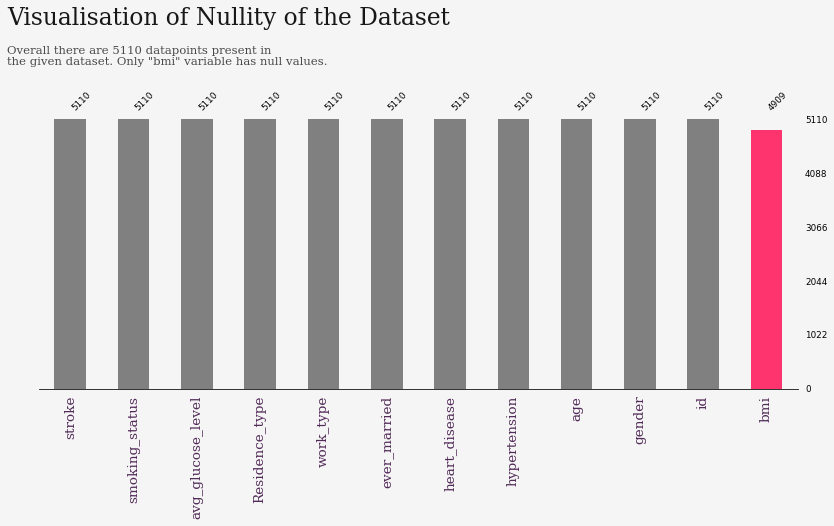

In [15]:
missing_values_bar_chart(df)

<style>
.title {
    color: #fe346e;
    font-size: 21px;
    font-family: Sans-serif;
    font-weight: 600;
    justify-content: center;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
}
</style>

### <div class="title">Data Information</div>

In [16]:
display_df_details(df)

<style>
.title {
    color: #fe346e;
    font-size: 21px;
    font-family: Sans-serif;
    font-weight: 600;
    justify-content: center;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
}
</style>

### <div class="title">Handle Missing Value & Data Transformation & Categorical Encoding</div>

In [17]:
# Notice that there are only Other unique values in the gender column
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [18]:
# Fill missing values in 'bmi' column with mean
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

# Replace gender value Female, Male, Other to Female, Male using mode
df.loc[df['gender'] == 'Other', 'gender'] = df['gender'].mode()[0]

# Drop 'id' column
if 'id' in df.columns:
    df = df.drop(['id'], axis=1)

# Data Transformations For Data Exploration Purpose 
if not 'bmi_cat' in df.columns:
    df_eda = df.copy()
    
    # Mapping 0 and 1 to 'No' and 'Yes'
    mapping = {0: 'No', 1: 'Yes'}
    df_eda['hypertension'] = df_eda['hypertension'].map(mapping)
    df_eda['heart_disease'] = df_eda['heart_disease'].map(mapping)
    
    df_eda['bmi_cat'] = pd.cut(df_eda['bmi'], bins = [0, 19, 25, 30, 10000], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
    df_eda['age_cat'] = pd.cut(df_eda['age'], bins = [0, 13, 18, 45, 60, 200], labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly'])
    df_eda['glucose_cat'] = pd.cut(df_eda['avg_glucose_level'], bins = [0, 90, 160, 230, 500], labels = ['Low', 'Normal', 'High', 'Very High'])
    df_eda.head()

# Categorical Encoding for object dtypes columns
df = encode_objectdtypes_columns(df, df.select_dtypes('object').columns)

# Filter out 'id' in num_col
num_col = [col for col in num_col if col != 'id']

display_df_details(df)

<style>
.border {
    color: white;
    font-weight: 550;
    font-size: 25px;
    font-family: Arial, Helvetica, sans-serif;
    padding: 15px;
    justify-content: center;
    box-shadow: 0 0px 3px rgba(0, 0, 0, 0.8);
    display: flex;
    max-width: 95%;
    margin: 0 auto;
    border-radius: 50px;
    transition: top ease 0.5s;
    overflow: hidden;
    position: relative;
    transition: top ease 0.5s;
    top: 5px;
}

.border-important {
    background-color: #fe346e;
}

.border:hover {
    box-shadow: 0 0px 10px rgba(0, 0, 0, 0.8);
    top: 0px
}
</style>

# <div class="border border-important">2. EDA & Data Visualization</div>

<style>
.title {
    color: #fe346e;
    font-size: 25px;
    font-family: Sans-serif;
    justify-content: left;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
    overflow: hidden;
    position: relative;
    transition: top ease 0.5s;
}
</style>

## <div class="title">2.1 Summary Statistics</div>

In [34]:
# Statistics of numerical columns
statistics = df[num_col].describe()

# Calculate sum and range
sum_val = df[num_col].sum()
range_val = df[num_col].max() - df[num_col].min()

# Append sum and range as new rows
statistics.loc['sum'] = sum_val
statistics.loc['range'] = range_val

statistics

age  avg_glucose_level            bmi
count    5110.000000        5110.000000    5110.000000
mean       43.226614         106.147677      28.893237
std        22.612647          45.283560       7.698018
min         0.080000          55.120000      10.300000
25%        25.000000          77.245000      23.800000
50%        45.000000          91.885000      28.400000
75%        61.000000         114.090000      32.800000
max        82.000000         271.740000      97.600000
sum    220888.000000      542414.630000  147644.440619
range      81.920000         216.620000      87.300000

<style>
.title {
    color: #fe346e;
    font-size: 21px;
    font-family: Sans-serif;
    font-weight: 450;
    justify-content: left;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
}
.text {
    color: #fe346e;
    font-size: 16px;
    font-family: Sans-serif;
    font-weight: 450;
    justify-content: left;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
}
</style>

<div class="title">Statistical Insight:</div>
<br/>
<div class="text">1. BMI has clear outliers at both ends, with values that are far outside normal ranges (10.3 and 97.6).</div>
<br/>
<div class="text">2. Glucose levels also show potential outliers, especially the very high value of 271.74 mg/dL, which is far from the typical range.</div>
<br/>
<div class="text">3. Age has a potential outlier at the very low end (0.08 years), though it could be valid depending on the dataset's context.</div>
<br/>

<style>
.title {
    color: #fe346e;
    font-size: 25px;
    font-family: Sans-serif;
    justify-content: left;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
    overflow: hidden;
    position: relative;
    transition: top ease 0.5s;
}
</style>

## <div class="title">2.2 Overview of univariate continuous variables</div>

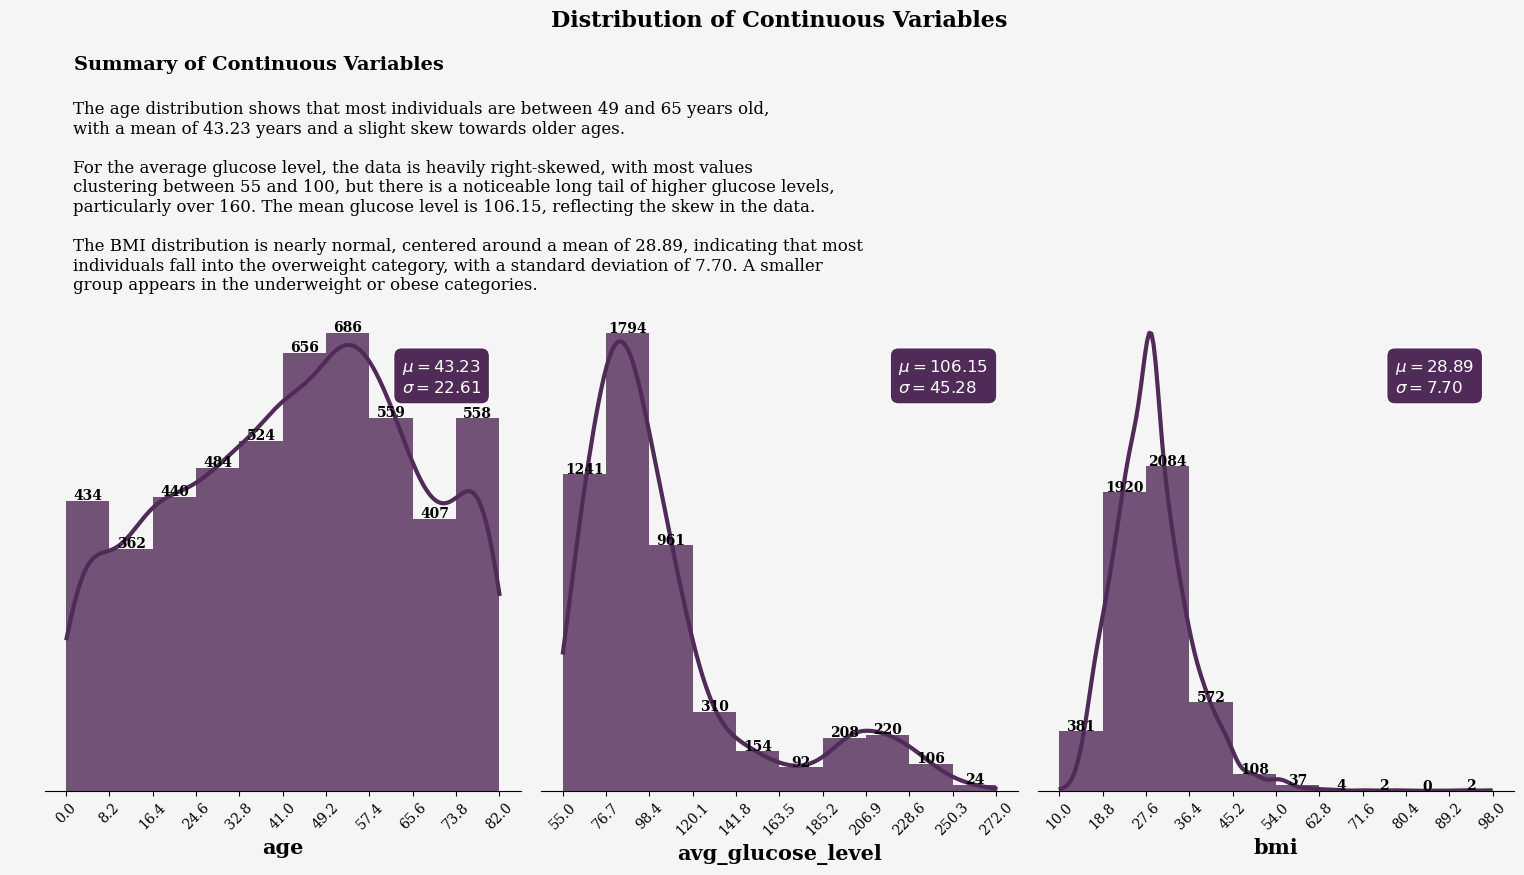

In [11]:
continuos_univariate_analysis(df, num_col)

<style>
.title {
    color: #fe346e;
    font-size: 25px;
    font-family: Sans-serif;
    justify-content: left;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
    overflow: hidden;
    position: relative;
    transition: top ease 0.5s;
}
</style>

## <div class="title">2.3 Overview of univariate categorical variables</div>

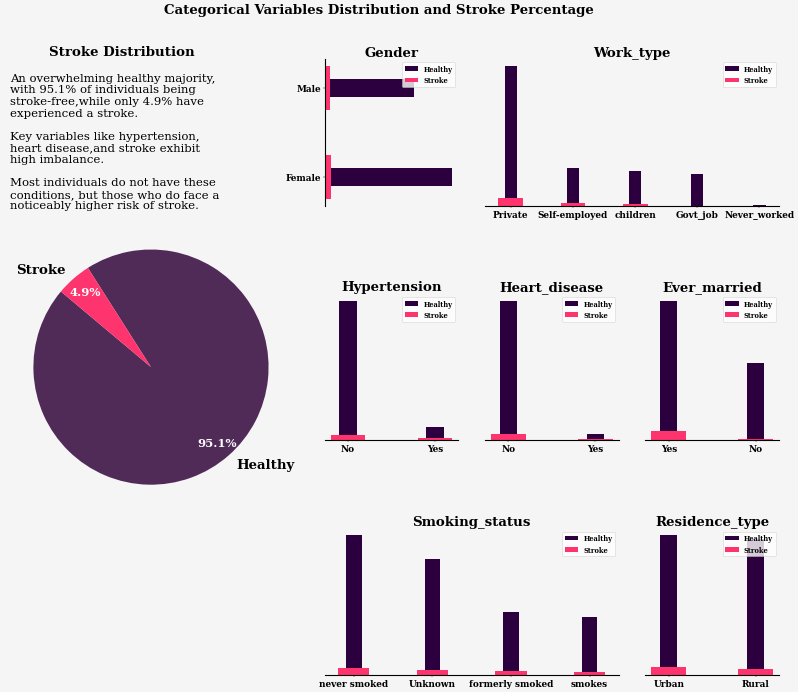

In [12]:
# Subtitle
subtitle = '''
An overwhelming healthy majority, 
with 95.1% of individuals being 
stroke-free,while only 4.9% have 
experienced a stroke.

Key variables like hypertension, 
heart disease,and stroke exhibit
high imbalance.

Most individuals do not have these
conditions, but those who do face a 
noticeably higher risk of stroke.
'''

categorical_data_visualisation(df_eda, cat_col, 'Categorical Variables Distribution and Stroke Percentage', subtitle)


<style>
.title {
    color: #fe346e;
    font-size: 25px;
    font-family: Sans-serif;
    justify-content: left;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
    overflow: hidden;
    position: relative;
    transition: top ease 0.5s;
}
</style>

## <div class="title">2.4 Bivariate analysis of continuous variables</div>

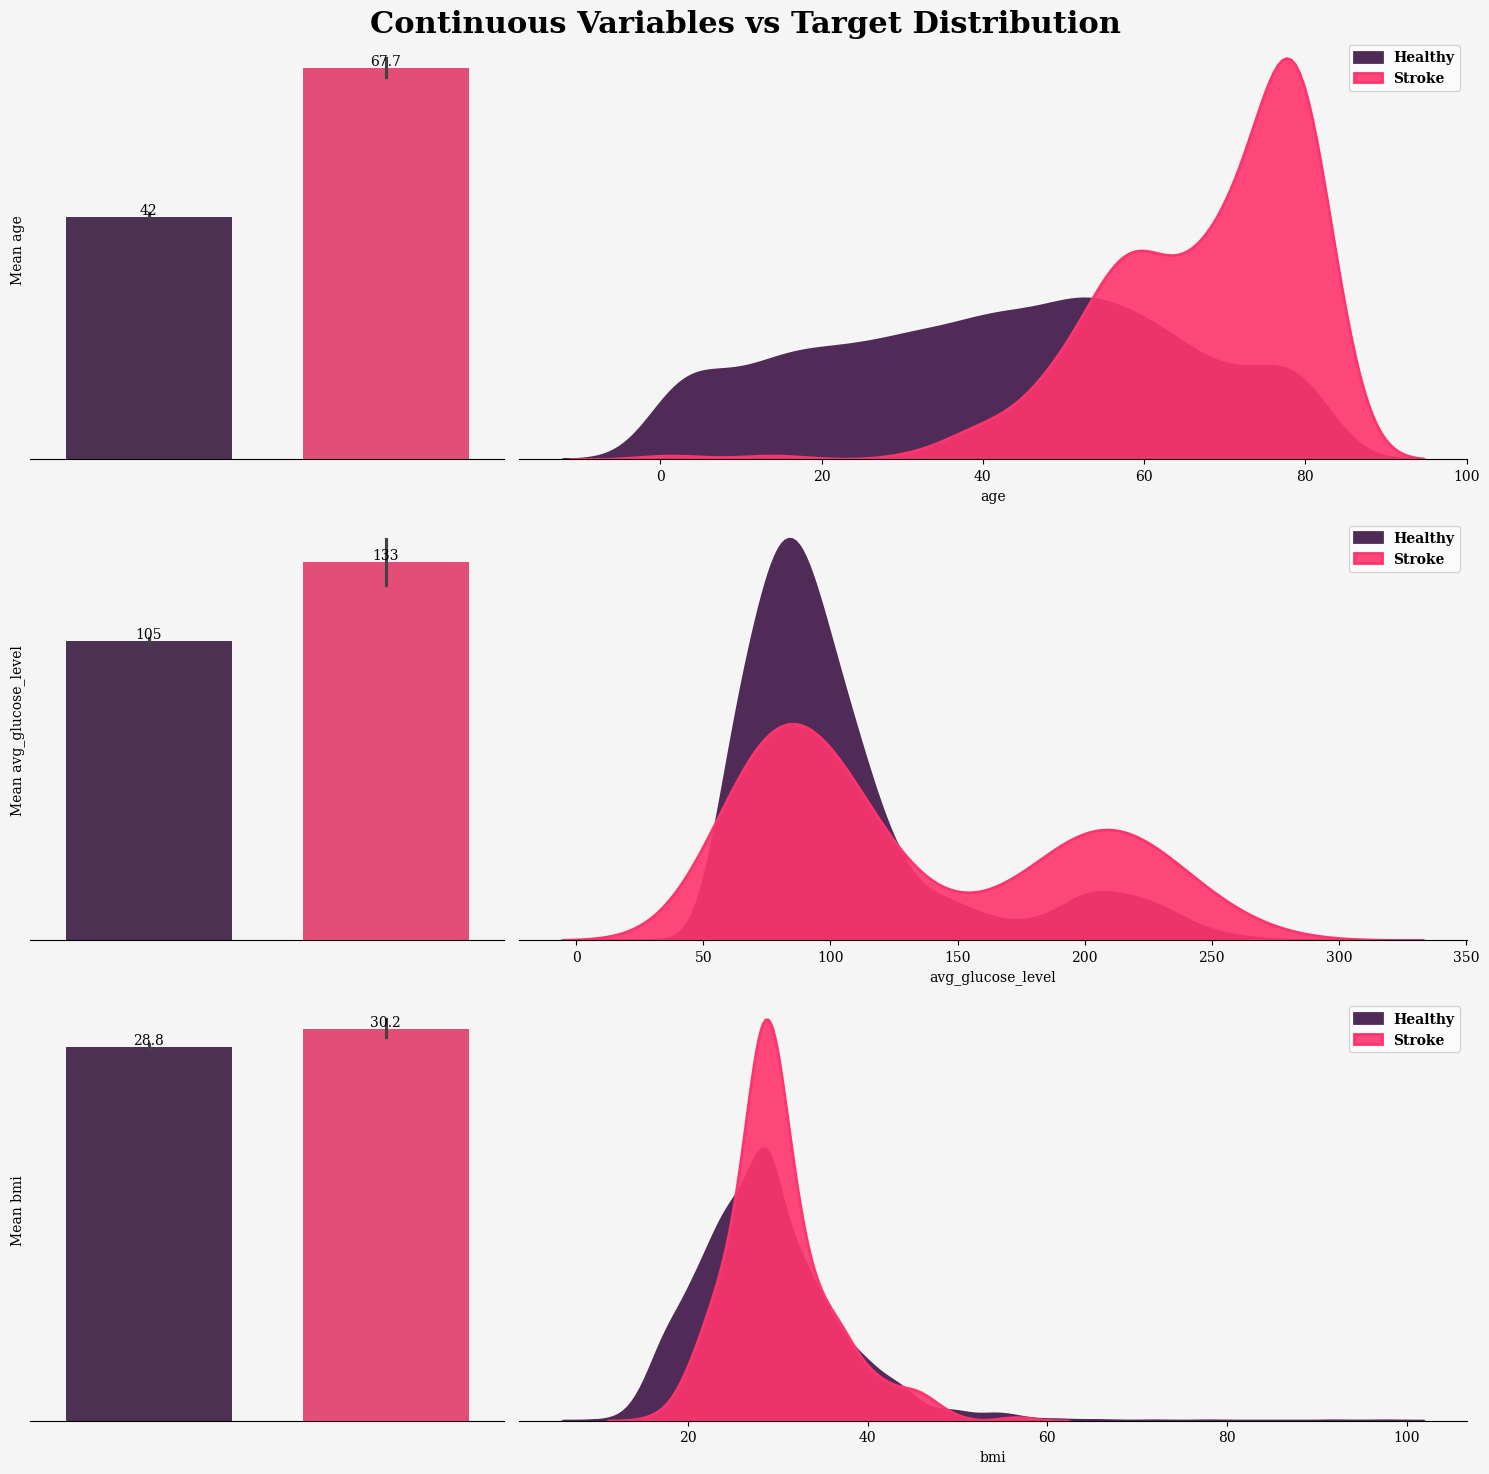

In [13]:
# Bar plots - showing the mean values.
# KDE plots - displaying the distribution for each target category.
# Define a function to plot continuos variable bivariate analysis
continuos_bivariate_analysis(df_eda, num_col)

<style>
.title {
    color: #fe346e;
    font-size: 25px;
    font-family: Sans-serif;
    justify-content: left;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
    overflow: hidden;
    position: relative;
    transition: top ease 0.5s;
}
</style>

## <div class="title">2.5 Bivariate analysis of categorical variables</div>

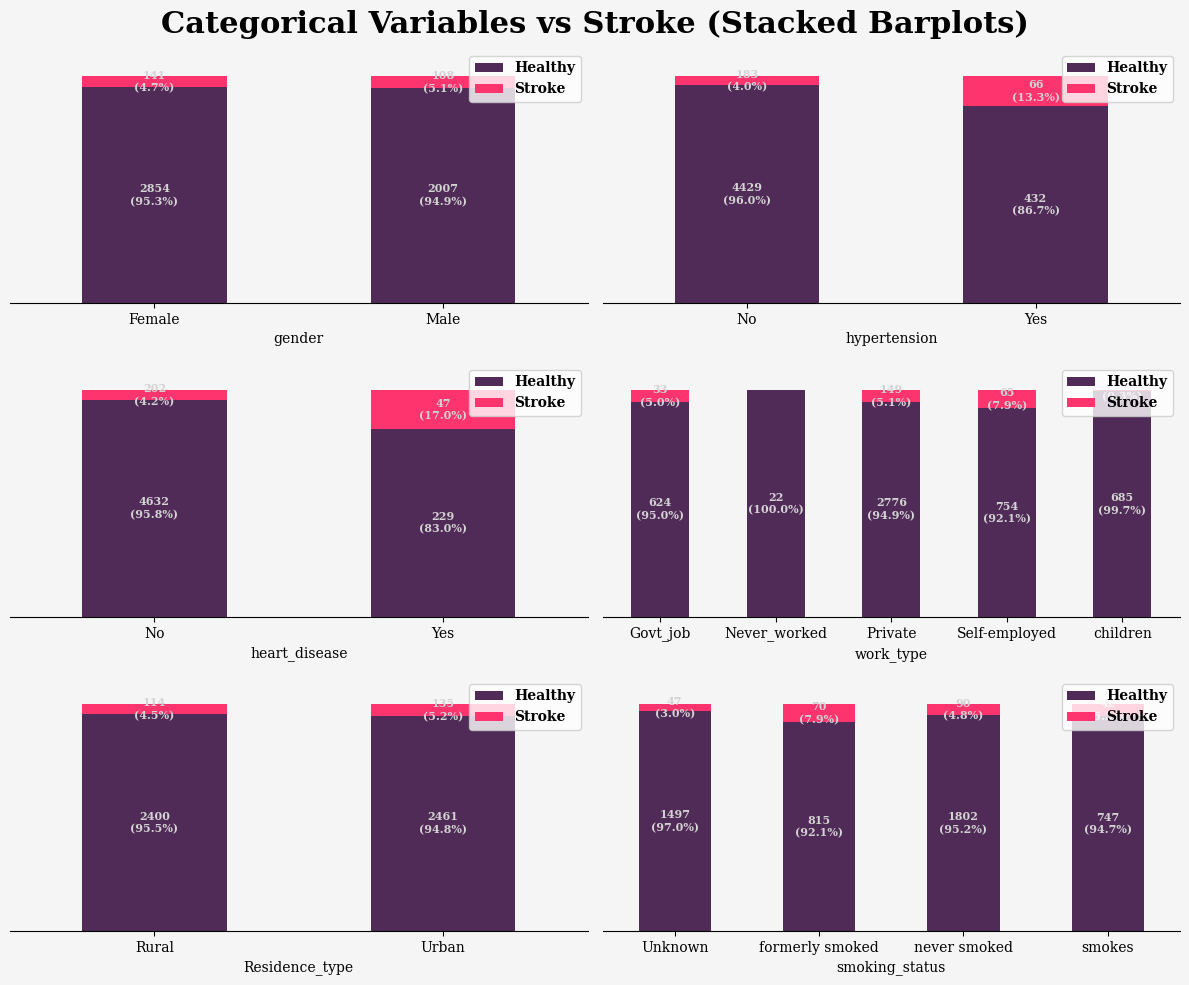

In [14]:
# display 100% stacked bar plots for each categorical variables illustrating the proportion of each category across the two target classes
# complemented by the exact counts and percentages on the bars.
cat_bivariate_analysis(df_eda, cat_col)

<style>
.title {
    color: #fe346e;
    font-size: 25px;
    font-family: Sans-serif;
    justify-content: left;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
    overflow: hidden;
    position: relative;
    transition: top ease 0.5s;
}
</style>

## <div class="title">2.6 Relationship between various variables</div>

<style>
.title {
    color: #fe346e;
    font-size: 21px;
    font-family: Sans-serif;
    font-weight: 600;
    justify-content: center;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
}
</style>

### <div class="title">Heatmap: Feature Correlation Overview</div>

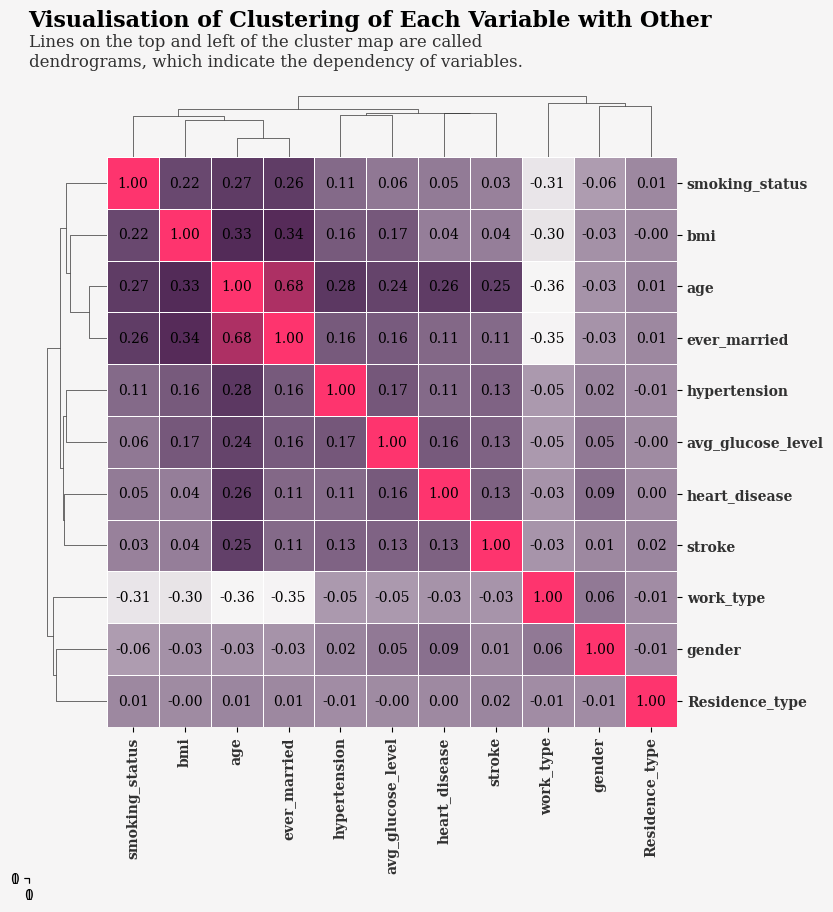

In [15]:
plot_correlation_heatmap(df)

<style>
.title {
    color: #fe346e;
    font-size: 21px;
    font-family: Sans-serif;
    font-weight: 600;
    justify-content: center;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
}
</style>

### <div class="title">Boxplot: Numerical Variables</div>

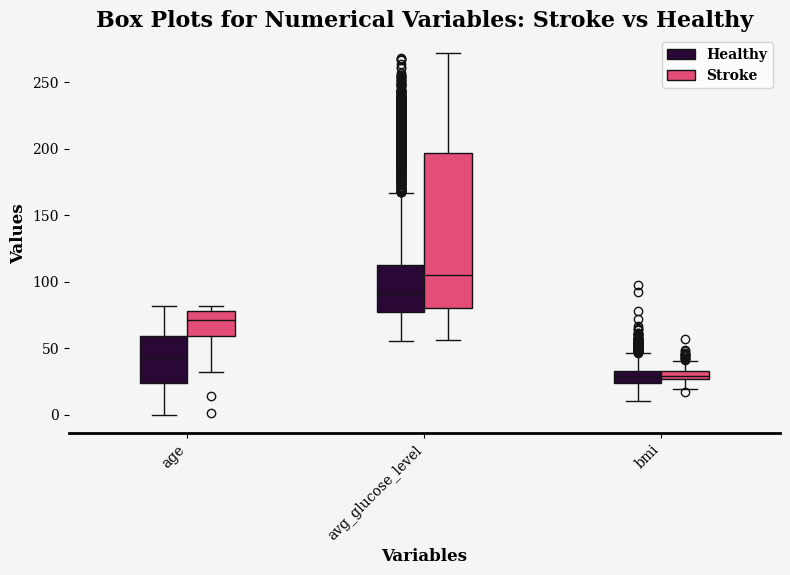

In [16]:
# Plot boxplot for numerical columns identify outliers
numerical_boxplot(df, num_col)

<style>
.title {
    color: #fe346e;
    font-size: 21px;
    font-family: Sans-serif;
    font-weight: 600;
    justify-content: center;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
}
</style>

### <div class="title">Pairplot: Pairwise Correlations</div>

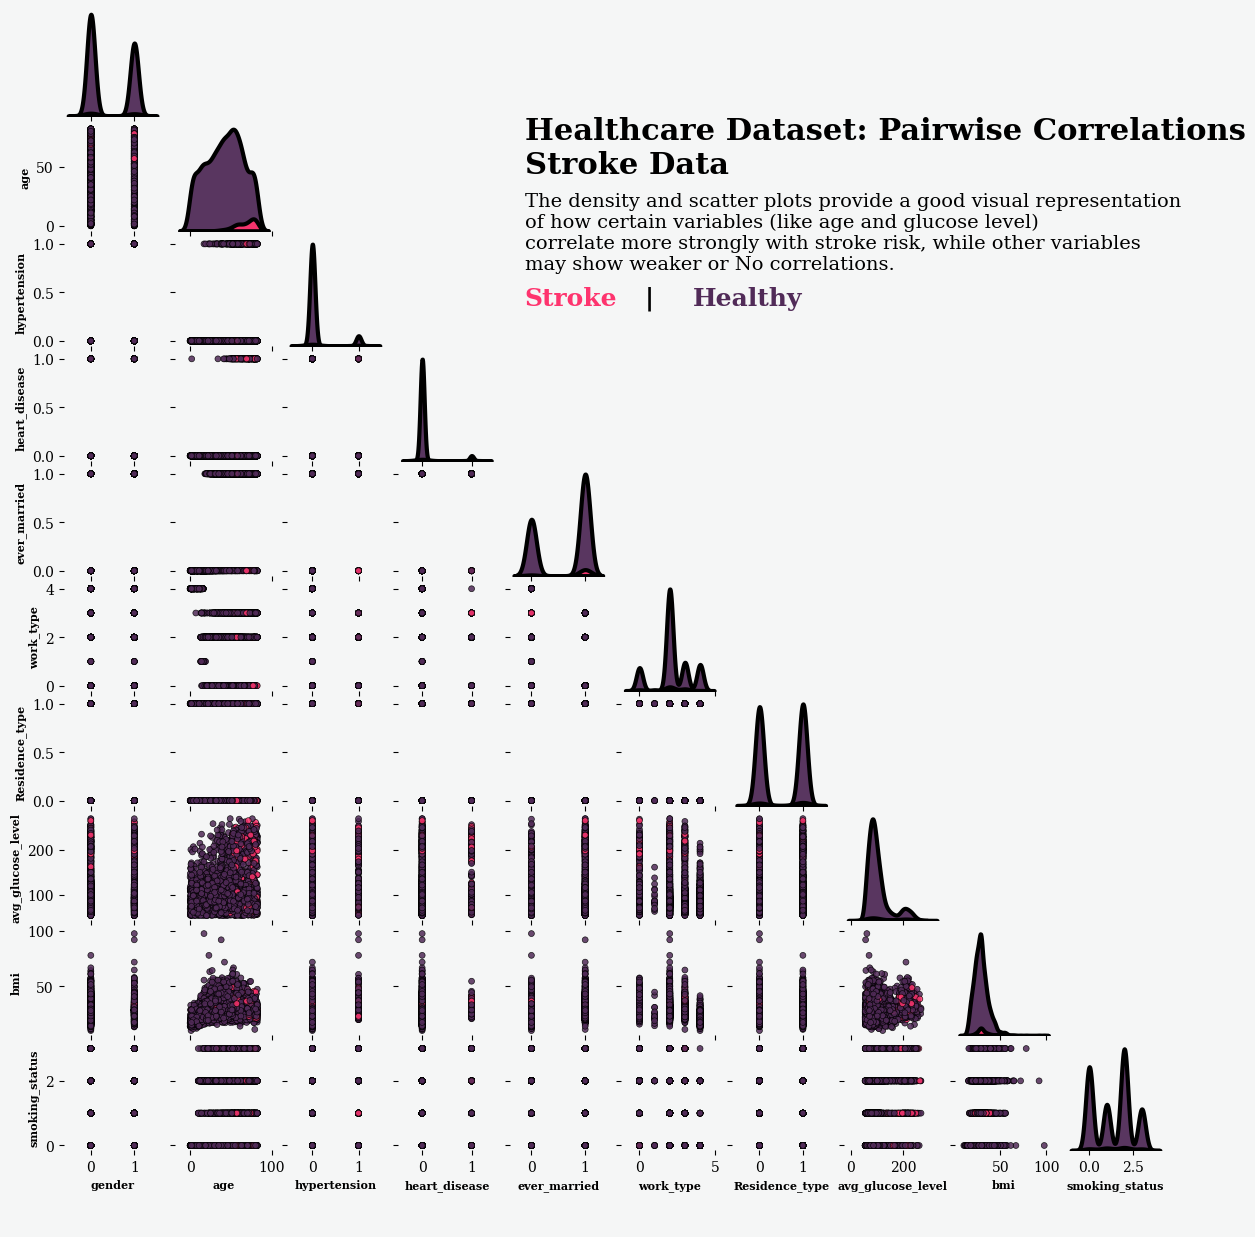

In [17]:
cust_pairplot(df.sample(frac=0.8), 'Stroke Data', 'kde', sign='on')

<style>
.title {
    color: #fe346e;
    font-size: 25px;
    font-family: Sans-serif;
    justify-content: left;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
    overflow: hidden;
    position: relative;
    transition: top ease 0.5s;
}
</style>

## <div class="title">2.7 Exploration of Continuous Variables</div>

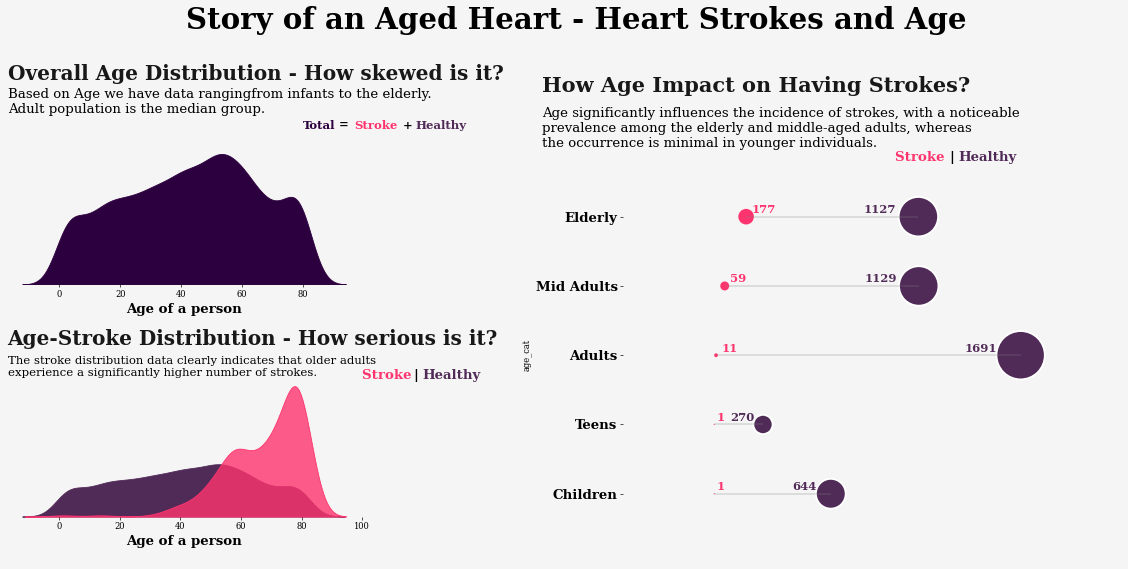

In [18]:
# Setting up figure
fig = plt.figure(figsize = (24,10), dpi = 60)

# Setting up gridspec
gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)

# Defining subplots
ax2 = fig.add_subplot(gs[1:4,0:8]) # Distribution plot
ax3 = fig.add_subplot(gs[6:9, 0:8]) # Hue distribution plot
ax1 = fig.add_subplot(gs[1:10,13:]) # Dumbbell plot

# Axes list
axes = [ax1,ax2, ax3]

# Setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(True)

# Dumbbell plot of stoke and healthy people
stroke_age = df_eda[df_eda['stroke'] == 1].age_cat.value_counts().sort_index(ascending=False)
healthy_age = df_eda[df_eda['stroke'] == 0].age_cat.value_counts().sort_index(ascending=False)

# Set ticks first
ax1.hlines(y=[0, 1, 2, 3, 4], xmin=[644, 270, 1691, 1129, 1127], 
          xmax=[1, 1, 11, 59, 177], color='grey', **{'linewidth': 0.5})

# Set labels
ax1.set_yticks([0, 1, 2, 3, 4])
ax1.set_yticklabels(labels=['Children', 'Teens', 'Adults', 'Mid Adults', 'Elderly'],
                    fontdict={'font': 'Serif', 'fontsize': 16, 'fontweight': 'bold', 'color': 'black'})

# Scatter plot
sns.scatterplot(y = stroke_age.index, x = stroke_age.values, s = stroke_age.values*2, color = '#fe346e', ax= ax1, alpha = 1)
sns.scatterplot(y = healthy_age.index, x = healthy_age.values, s = healthy_age.values*2, color = '#512b58', ax= ax1, alpha = 1)

# Set limits
ax1.axes.get_xaxis().set_visible(False)
ax1.set_xlim(xmin = -500, xmax = 2250)
ax1.set_ylim(ymin = -1,ymax = 5)

# Set y-labels
ax1.set_yticklabels(labels = ['Children', 'Teens', 'Adults', 'Mid Adults', 'Elderly'], fontdict = {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})

# Set title
ax1.text(-950,5.8, 'How Age Impact on Having Strokes?' ,{'font': 'Serif', 'size': '25','weight':'bold', 'color':'black'}, alpha = 0.9)
ax1.text(1000,4.8, 'Stroke ', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
ax1.text(1300,4.8, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax1.text(1350,4.8, 'Healthy', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'weight':'bold','color':'#512b58'})
ax1.text(-950,5., 'Age significantly influences the incidence of strokes, with a noticeable\nprevalence among the elderly and middle-aged adults, whereas\nthe occurrence is minimal in younger individuals.',
        {'font':'Serif', 'size':'16','color': 'black'})

# Set text
ax1.text(stroke_age.values[0] + 30,4.05, stroke_age.values[0], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(healthy_age.values[0] - 300,4.05, healthy_age.values[0], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#512b58'})

ax1.text(stroke_age.values[1] + 30,3.05, stroke_age.values[1], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(healthy_age.values[1] - 300,3.05, healthy_age.values[1], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#512b58'})

ax1.text(stroke_age.values[2] + 30,2.05, stroke_age.values[2], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(healthy_age.values[2] - 310, 2.05, healthy_age.values[2], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#512b58'})

ax1.text(stroke_age.values[3] + 10,1.05, stroke_age.values[3], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(healthy_age.values[3] - 180,1.05, healthy_age.values[3], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#512b58'})

ax1.text(stroke_age.values[4] + 10,0.05, stroke_age.values[4], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(healthy_age.values[4] - 210,0.05, healthy_age.values[4], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#512b58'})

# Distribution plots ---- only single variable
sns.kdeplot(data=df, x='age', ax=ax2, fill=True, color='#2c003e', alpha=1)
ax2.set_xlabel('Age of a person', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax2.text(-17,0.025,'Overall Age Distribution - How skewed is it?', {'font':'Serif', 'color': 'black','weight':'bold','size':24}, alpha = 0.9)
ax2.text(-17,0.021, 'Based on Age we have data rangingfrom infants to the elderly.\nAdult population is the median group.', 
        {'font':'Serif', 'size':'16','color': 'black'})
ax2.text(80,0.019, 'Total',{'font':'Serif', 'size':'14','color': '#2c003e','weight':'bold'})
ax2.text(92,0.019, '=',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(97,0.019, 'Stroke',{'font':'Serif', 'size':'14','color': '#fe346e','weight':'bold'})
ax2.text(113,0.019, '+',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(117,0.019, 'Healthy',{'font':'Serif', 'size':'14','color': '#512b58','weight':'bold'})

# Distribution plots with hue of strokes
sns.kdeplot(data=df[df['stroke'] == 0], x='age', ax=ax3, fill=True, alpha=1, color='#512b58')
sns.kdeplot(data=df[df['stroke'] == 1], x='age', ax=ax3, fill=True, alpha=0.8, color='#fe346e')

# Set Xlabels
ax3.set_xlabel('Age of a person', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

# Set Subtitle
ax3.text(-17,0.0525,'Age-Stroke Distribution - How serious is it?', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)
ax3.text(-17,0.043,'The stroke distribution data clearly indicates that older adults\nexperience a significantly higher number of strokes.', {'font':'Serif', 'color': 'black', 'size':14})
ax3.text(100,0.042, 'Stroke ', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
ax3.text(117,0.042, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax3.text(120,0.042, 'Healthy', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'weight':'bold','color':'#512b58'})

# Set title
fig.text(0.25,1,'Story of an Aged Heart - Heart Strokes and Age',{'font':'Serif', 'weight':'bold','color': 'black', 'size':35})
plt.show()

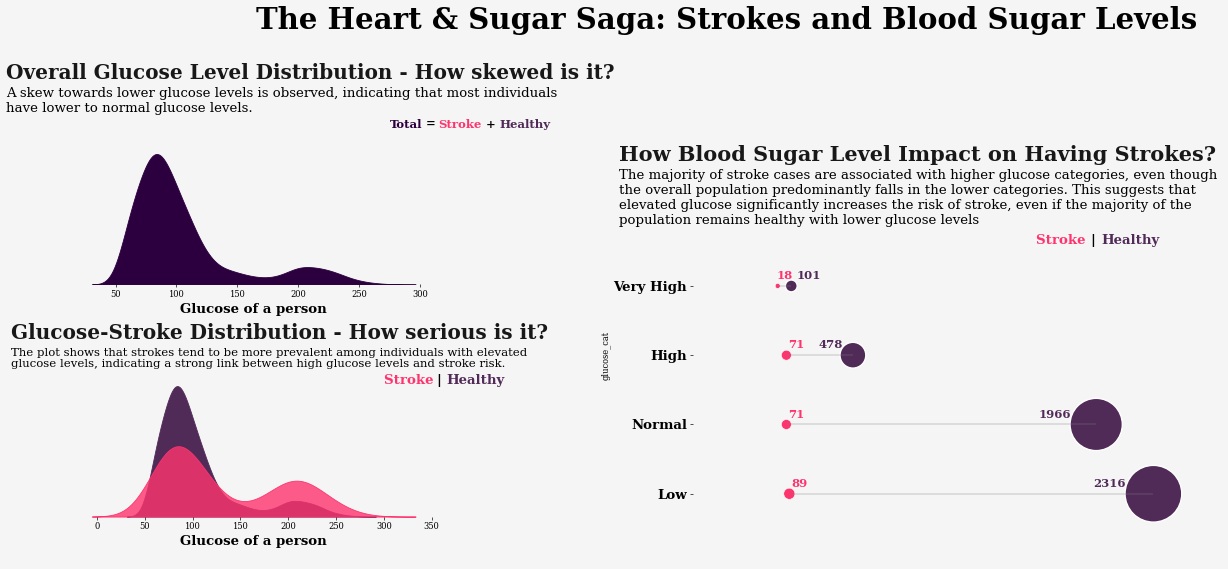

In [19]:
# Setting up figure
fig = plt.figure(figsize = (24,10), dpi = 60)

# Setting up gridspec
gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)

# Defining subplots
ax2 = fig.add_subplot(gs[1:4,0:8]) # Distribution plot
ax3 = fig.add_subplot(gs[6:9, 0:8]) # Hue distribution plot
ax1 = fig.add_subplot(gs[1:10,13:]) # Dumbbell plot

# Axes list
axes = [ ax1,ax2, ax3]

# Setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(True)

# Dumbbell plot of stoke and healthy people
stroke_glucose = df_eda[df_eda['stroke'] == 1].glucose_cat.value_counts()
healthy_glucose = df_eda[df_eda['stroke'] == 0].glucose_cat.value_counts()

# Adjust the horizontal lines to match 4 categories
ax1.hlines(y=[0, 1, 2, 3], xmin=[89, 71, 71, 18], xmax=[2316, 1966, 478, 101], color='grey', **{'linewidth': 0.5})

# Adjust y-ticks to match the four categories
ax1.set_yticks([0, 1, 2, 3])
ax1.set_yticklabels(labels=['Low', 'Normal', 'High', 'Very High'], 
                    fontdict={'font': 'Serif', 'fontsize': 16, 'fontweight': 'bold', 'color': 'black'})


# Scatter plot
sns.scatterplot(y = stroke_glucose.index , x = stroke_glucose.values, s = stroke_glucose.values*2, color = '#fe346e', ax = ax1, alpha = 1)
sns.scatterplot(y = healthy_glucose.index, x = healthy_glucose.values, s = healthy_glucose.values*2, color = '#512b58', ax = ax1, alpha = 1)

# Set limits
ax1.axes.get_xaxis().set_visible(False)
ax1.set_xlim(xmin = -500, xmax = 2550)
ax1.set_ylim(ymin = -1, ymax = 5)

# Set title
ax1.text(-950,4.8, 'How Blood Sugar Level Impact on Having Strokes?' ,{'font': 'Serif', 'size': '25','weight':'bold', 'color':'black'},alpha = 0.9)
ax1.text(1600,3.6, 'Stroke ', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
ax1.text(1930,3.6, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax1.text(2000,3.6, 'Healthy', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'weight':'bold','color':'#512b58'})
ax1.text(-950,3.9, 'The majority of stroke cases are associated with higher glucose categories, even though \nthe overall population predominantly falls in the lower categories. This suggests that \nelevated glucose significantly increases the risk of stroke, even if the majority of the\npopulation remains healthy with lower glucose levels',
        {'font':'Serif', 'size':'16','color': 'black'})

# Set text
ax1.text(stroke_glucose.values[0]+ 10, 0.1, stroke_glucose.values[0], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(healthy_glucose.values[0] - 370,0.1, healthy_glucose.values[0], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#512b58'})

ax1.text(stroke_glucose.values[1] + 10,1.1, stroke_glucose.values[1], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(healthy_glucose.values[1] - 350,1.1, healthy_glucose.values[1], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#512b58'})

ax1.text(stroke_glucose.values[2] + 10,2.1, stroke_glucose.values[2], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(healthy_glucose.values[2] - 210,2.1, healthy_glucose.values[2], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#512b58'})

ax1.text(stroke_glucose.values[3]- 5,3.1, stroke_glucose.values[3], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(healthy_glucose.values[3] + 30,3.1, healthy_glucose.values[3], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#512b58'})

# Distribution plots ---- only single variable
sns.kdeplot(data=df, x='avg_glucose_level', ax=ax2, fill=True, color='#2c003e', alpha=1)
ax2.set_xlabel('Glucose of a person', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax2.text(-40,0.025,'Overall Glucose Level Distribution - How skewed is it?', {'font':'Serif', 'color': 'black','weight':'bold','size':24}, alpha = 0.9)
ax2.text(-40,0.021, 'A skew towards lower glucose levels is observed, indicating that most individuals \nhave lower to normal glucose levels.', 
        {'font':'Serif', 'size':'16','color': 'black'})

ax2.text(275,0.019, 'Total',{'font':'Serif', 'size':'14','color': '#2c003e','weight':'bold'})
ax2.text(305,0.019, '=',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(315,0.019, 'Stroke',{'font':'Serif', 'size':'14','color': '#fe346e','weight':'bold'})
ax2.text(354,0.019, '+',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(365,0.019, 'Healthy',{'font':'Serif', 'size':'14','color': '#512b58','weight':'bold'})

# Distribution plots with hue of strokes
sns.kdeplot(data=df[df['stroke'] == 0], x='avg_glucose_level', ax=ax3, fill=True, alpha=1, color='#512b58')
sns.kdeplot(data=df[df['stroke'] == 1], x='avg_glucose_level', ax=ax3, fill=True, alpha=0.8, color='#fe346e')

# Set Xlabels
ax3.set_xlabel('Glucose of a person', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

# Set Subtitle
ax3.text(-90,0.022,'Glucose-Stroke Distribution - How serious is it?', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)
ax3.text(-90,0.0185,'The plot shows that strokes tend to be more prevalent among individuals with elevated \nglucose levels, indicating a strong link between high glucose levels and stroke risk.', {'font':'Serif', 'color': 'black', 'size':14})
ax3.text(300,0.0165, 'Stroke ', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
ax3.text(355,0.0165, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax3.text(365,0.0165, 'Healthy', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'weight':'bold','color':'#512b58'})

# Set title
fig.text(0.25,1,'The Heart & Sugar Saga: Strokes and Blood Sugar Levels',{'font':'Serif', 'weight':'bold','color': 'black', 'size':35})
plt.show()

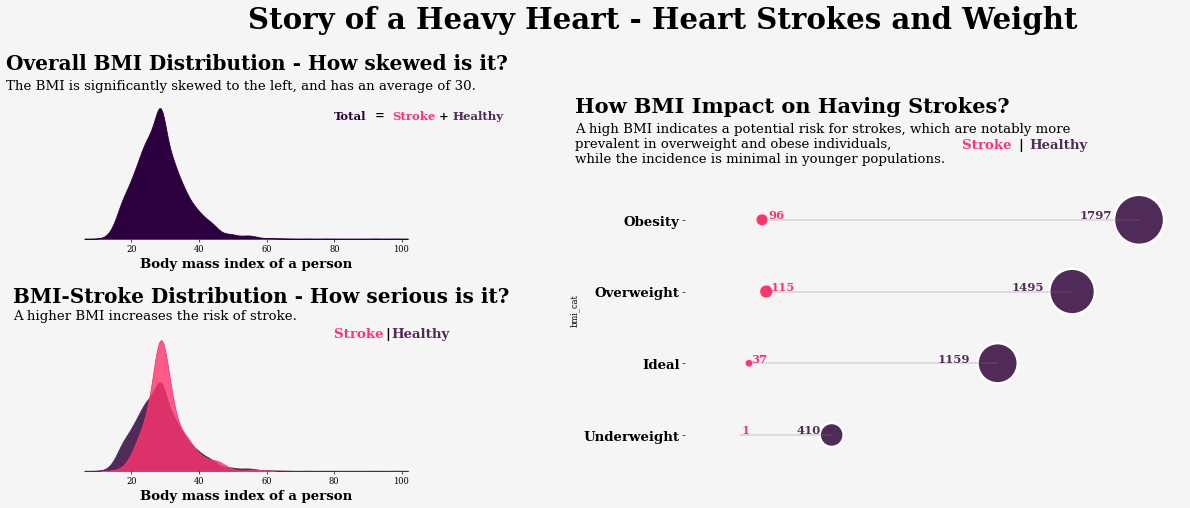

In [20]:
# Create a figure with specified size and resolution
fig = plt.figure(figsize=(24, 10), dpi=60)

# Create a grid of 10 rows and 24 columns with space adjustments
gs = fig.add_gridspec(10, 24)
gs.update(wspace=1, hspace=0.05)

# Assign different parts of the grid for each subplot
ax2 = fig.add_subplot(gs[1:4, 0:8])  # Distribution plot for BMI
ax3 = fig.add_subplot(gs[6:9, 0:8])  # Hue distribution plot for BMI vs stroke
ax1 = fig.add_subplot(gs[2:9, 13:])  # Dumbbell plot for stroke vs healthy people by BMI category

# Store all axes in a list to iterate over and apply common settings
axes = [ax1, ax2, ax3]

# Set axis visibility and remove spines for a clean look
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)  # Hide y-axis
    ax.set_facecolor('#f6f5f5')  # Set background color
    
    # Remove all spines (border lines) for each axis
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

# Set background color of the figure
fig.patch.set_facecolor('#f6f5f5')

# Hide x-axis for the dumbbell plot, but keep y-axis visible
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(True)
ax1.set_xlim(xmin=-250, xmax=2000)  # Set x-axis limits
ax1.set_ylim(ymin=-1, ymax=3.5)     # Set y-axis limits

# Dumbbell plot showing BMI categories for stroke and healthy individuals
stroke_bmi = df_eda[df_eda['stroke'] == 1].bmi_cat.value_counts().sort_index(ascending=False)  # Stroke data
healthy_bmi = df_eda[df_eda['stroke'] == 0].bmi_cat.value_counts().sort_index(ascending=False)  # Healthy data

# Draw grey horizontal lines representing categories
ax1.hlines(y=['Obesity', 'Overweight', 'Ideal', 'Underweight'], xmin=[96, 115, 37, 1],
           xmax=[1797, 1495, 1159, 410], color='grey', linewidth=0.5)

# Plot scatter points for stroke and healthy people based on BMI categories
sns.scatterplot(y=stroke_bmi.index, x=stroke_bmi.values, s=stroke_bmi.values * 2, color='#fe346e', ax=ax1, alpha=1)  # Stroke
sns.scatterplot(y=healthy_bmi.index, x=healthy_bmi.values, s=healthy_bmi.values * 2, color='#512b58', ax=ax1, alpha=1)  # Healthy

# Set y-ticks and labels for BMI categories
ax1.set_yticks(range(4))  
ax1.set_yticklabels(labels=['Obesity', 'Overweight', 'Ideal', 'Underweight'],
                    fontdict={'font': 'Serif', 'fontsize': 16, 'fontweight': 'bold', 'color': 'black'})

# Add title and annotations explaining the BMI impact on strokes
ax1.text(-750, -1.5, 'How BMI Impact on Having Strokes?', {'font': 'Serif', 'size': '25', 'weight': 'bold', 'color': 'black'})
ax1.text(1000, -1., 'Stroke ', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': '#fe346e'})
ax1.text(1250, -1, '|', {'color': 'black', 'size': '16', 'weight': 'bold'})
ax1.text(1300, -1, 'Healthy', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': '#512b58'})
ax1.text(-750, -0.8, 'A high BMI indicates a potential risk for strokes, which are notably more \nprevalent in overweight and obese individuals, \nwhile the incidence is minimal in younger populations.',
         {'font': 'Serif', 'size': '16', 'color': 'black'})

# Add numeric labels near the scatter points for stroke and healthy groups
ax1.text(healthy_bmi.values[0] - 270, -0.02, healthy_bmi.values[0], {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': '#512b58'})
ax1.text(stroke_bmi.values[0] + 30, -0.02, stroke_bmi.values[0], {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': '#fe346e'})

ax1.text(healthy_bmi.values[1] - 275, 0.98, healthy_bmi.values[1], {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': '#512b58'})
ax1.text(stroke_bmi.values[1] + 20, 0.98, stroke_bmi.values[1], {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': '#fe346e'})

ax1.text(healthy_bmi.values[2] - 270, 1.98, healthy_bmi.values[2], {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': '#512b58'})
ax1.text(stroke_bmi.values[2] + 10, 1.98, stroke_bmi.values[2], {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': '#fe346e'})

ax1.text(healthy_bmi.values[3] - 160, 2.98, healthy_bmi.values[3], {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': '#512b58'})
ax1.text(stroke_bmi.values[3] + 0.5, 2.98, stroke_bmi.values[3], {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': '#fe346e'})

# Plot the overall BMI distribution (all individuals)
sns.kdeplot(data=df_eda, x='bmi', ax=ax2, fill=True, color='#2c003e', alpha=1)
ax2.set_xlabel('Body mass index of a person', fontdict={'font': 'Serif', 'color': 'black', 'size': 16, 'weight': 'bold'})
ax2.text(-17, 0.085, 'Overall BMI Distribution - How skewed is it?', {'font': 'Serif', 'color': 'black', 'weight': 'bold', 'size': 24})
ax2.text(-17, 0.075, 'The BMI is significantly skewed to the left, and has an average of 30.',
         {'font': 'Serif', 'size': '16', 'color': 'black'})
ax2.text(80, 0.06, 'Total', {'font': 'Serif', 'size': '14', 'color': '#2c003e', 'weight': 'bold'})
ax2.text(92, 0.06, '=', {'font': 'Serif', 'size': '14', 'color': 'black', 'weight': 'bold'})
ax2.text(97, 0.06, 'Stroke', {'font': 'Serif', 'size': '14', 'color': '#fe346e', 'weight': 'bold'})
ax2.text(111, 0.06, '+', {'font': 'Serif', 'size': '14', 'color': 'black', 'weight': 'bold'})
ax2.text(115, 0.06, 'Healthy', {'font': 'Serif', 'size': '14', 'color': '#512b58', 'weight': 'bold'})

# Plot BMI distribution with hue (stroke vs healthy)
sns.kdeplot(data=df_eda[df_eda['stroke'] == 0], x='bmi', ax=ax3, fill=True, alpha=1, color='#512b58')  # Healthy
sns.kdeplot(data=df_eda[df_eda['stroke'] == 1], x='bmi', ax=ax3, fill=True, alpha=0.8, color='#fe346e')  # Stroke

ax3.set_xlabel('Body mass index of a person', fontdict={'font': 'Serif', 'color': 'black', 'weight': 'bold', 'size': 16})

# Add title and annotations for the hue distribution plot
ax3.text(-15, 0.12, 'BMI-Stroke Distribution - How serious is it?', {'font': 'Serif', 'weight': 'bold', 'color': 'black', 'size': 24})
ax3.text(-15, 0.108, 'A higher BMI increases the risk of stroke.', {'font': 'Serif', 'color': 'black', 'size': 16})
ax3.text(80, 0.095, 'Stroke ', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': '#fe346e'})
ax3.text(95, 0.095, '|', {'color': 'black', 'size': '16', 'weight': 'bold'})
ax3.text(97, 0.095, 'Healthy', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': '#512b58'})

# Add an overarching title for the entire figure
fig.text(0.25, 0.925, 'Story of a Heavy Heart - Heart Strokes and Weight', {'font': 'Serif', 'weight': 'bold', 'color': 'black', 'size': 35})

# Display the final visualisation
plt.show()

<style>
.title {
    color: #fe346e;
    font-size: 25px;
    font-family: Sans-serif;
    justify-content: left;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
    overflow: hidden;
    position: relative;
    transition: top ease 0.5s;
}
</style>
## <div class="title">2.8 Exploration of Categorical Variables</div>

<style>
.title {
    color: #fe346e;
    font-size: 21px;
    font-family: Sans-serif;
    font-weight: 600;
    justify-content: center;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
}
</style>

### <div class="title">Gender Distribution</div>

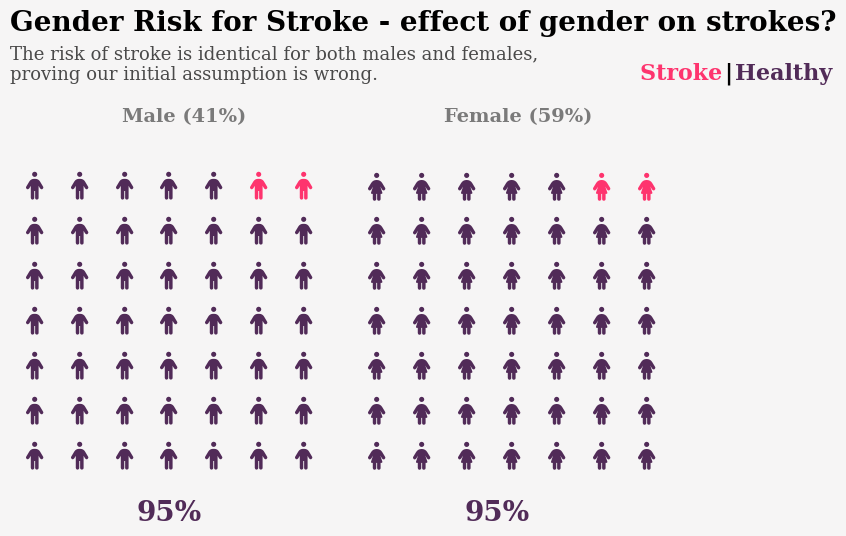

In [21]:
# Generate stroke and healthy gender counts based on 'stroke' column.
stroke_gender_count = df[df['stroke'] == 1]['gender'].value_counts()
healthy_gender_count = df[df['stroke'] == 0]['gender'].value_counts()

# Calculate total counts for female and male.
female_count = df['gender'].value_counts().values[0]
male_count = df['gender'].value_counts().values[1]

# Calculate stroke and healthy percentages for both genders.
stroke_female_percentage = int(round(stroke_gender_count.values[0] / female_count * 100, 0))
stroke_male_percentage = int(round(stroke_gender_count.values[1] / male_count * 100, 0))
healthy_female_percentage = int(round(healthy_gender_count.values[0] / female_count * 100, 0))
healthy_male_percentage = int(round(healthy_gender_count.values[1] / male_count * 100, 0))

# Calculate total percentage distribution for male and female.
total_female_percentage = int(round(female_count / (female_count + male_count) * 100, 0))
total_male_percentage = int(round(male_count / (female_count + male_count) * 100, 0))

# Create a Waffle plot representing male and female stroke and healthy counts.
fig = plt.figure(FigureClass=Waffle, 
                 constrained_layout=True,
                 figsize=(7, 7),
                 facecolor='#f6f5f5',
                 dpi=100,
                 interval_ratio_y=0.1,
                 interval_ratio_x=0.1,
                 plot_anchor='C',
                 vertical=True,
                 icon_legend=False,
                 icon_size=20,
                 alpha=0.1,
                 plots={
                     121: {
                         'rows': 7,
                         'columns': 7,
                         'values': [healthy_male_percentage, stroke_male_percentage],
                         'colors': ['#512b58', '#fe346e'],
                         'icons': 'male',
                     },
                     122: {
                         'rows': 7,
                         'columns': 7,
                         'values': [healthy_female_percentage, stroke_female_percentage],
                         'colors': ['#512b58', '#fe346e'],
                         'icons': 'female',
                     }
                 },
)

# Adjust space between subplots.
fig.subplots_adjust(wspace=2000, hspace=2000)

# Add title, subtitles, and labels to the plot.
fig.text(0., 0.9, 'Gender Risk for Stroke - effect of gender on strokes?', {'font':'Serif', 'size':20, 'color':'black', 'weight':'bold'})
fig.text(0., 0.83, 'The risk of stroke is identical for both males and females,\nproving our initial assumption is wrong.', 
         {'font':'Serif', 'size':13, 'color':'black', 'weight':'normal'}, alpha=0.7)
fig.text(0.24, 0.32, 'ooo', {'font':'Serif', 'size':16, 'weight':'bold' ,'color':'#f6f5f5'})
fig.text(0.65, 0.32, 'ooo', {'font':'Serif', 'size':16, 'weight':'bold', 'color':'#f6f5f5'})
fig.text(0.18, 0.20, '{}%'.format(healthy_male_percentage), {'font':'Serif', 'size':20, 'weight':'bold', 'color':'#512b58'}, alpha=1)
fig.text(0.65, 0.20, '{}%'.format(healthy_female_percentage), {'font':'Serif', 'size':20, 'weight':'bold', 'color':'#512b58'}, alpha=1)
fig.text(0.16, 0.77, 'Male ({}%)'.format(total_male_percentage), {'font':'Serif', 'size':14, 'weight':'bold', 'color':'black'}, alpha=0.5)
fig.text(0.62, 0.77, 'Female ({}%)'.format(total_female_percentage), {'font':'Serif', 'size':14, 'weight':'bold', 'color':'black'}, alpha=0.5)

# Add labels to indicate stroke and healthy categories.
fig.text(0.9, 0.83, 'Stroke ', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
fig.text(1.02, 0.83, '|', {'color':'black', 'size':'16', 'weight': 'bold'})
fig.text(1.035, 0.83, 'Healthy', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'weight':'bold','color':'#512b58'}, alpha=1)

# Display the plot.
fig.tight_layout()
plt.show()

<style>
.title {
    color: #fe346e;
    font-size: 21px;
    font-family: Sans-serif;
    font-weight: 600;
    justify-content: center;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
}
</style>

### <div class="title">Marriage Distribution</div>

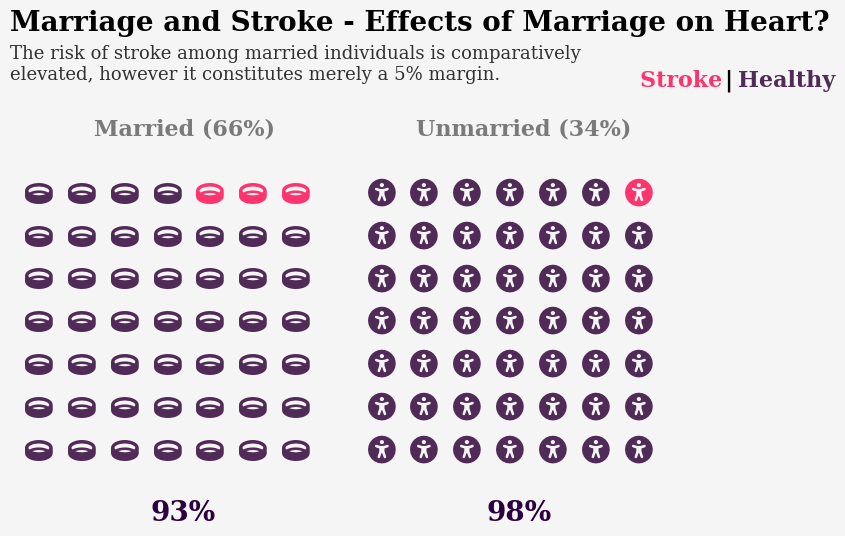

In [22]:
# Get counts of married and unmarried individuals based on stroke status.
stroke_married_status = df[df['stroke'] == 1]['ever_married'].value_counts()
healthy_married_status = df[df['stroke'] == 0]['ever_married'].value_counts()

# Calculate total counts for married and unmarried individuals.
married_count = df['ever_married'].value_counts().values[0]
unmarried_count = df['ever_married'].value_counts().values[1]

# Calculate percentage of married/unmarried individuals who had a stroke.
stroke_unmarried_percentage = int(round(stroke_married_status.values[1] / unmarried_count * 100, 0))
stroke_married_percentage = int(round(stroke_married_status.values[0] / married_count * 100, 0))

# Calculate percentage of married/unmarried individuals who did not have a stroke.
healthy_unmarried_percentage = int(round(healthy_married_status.values[1] / unmarried_count * 100, 0))
healthy_married_percentage = int(round(healthy_married_status.values[0] / married_count * 100, 0))

# Calculate overall percentage of married/unmarried individuals.
unmarried_overall_percentage = int(round(unmarried_count / (unmarried_count + married_count) * 100, 0))
married_overall_percentage = int(round(married_count / (unmarried_count + married_count) * 100, 0))

# Create the Waffle plot to visualise married and unmarried individuals based on stroke and healthy status.
fig = plt.figure(FigureClass=Waffle, 
                 constrained_layout=True,
                 figsize=(7, 7),
                 facecolor='#f6f5f5',
                 vertical=True,
                 dpi=100,
                 interval_ratio_y=0.005,
                 interval_ratio_x=0.005,
                 plot_anchor='C',
                 icon_size=20,
                 icon_legend=False,
                 alpha=0.8,
                 starting_location='NE',
                 plots={
                     121: {  # First subplot for married individuals.
                         'rows': 7,
                         'columns': 7,
                         'values': [stroke_married_percentage, healthy_married_percentage],
                         'colors': ['#fe346e', '#512b58'],  # Colors for stroke and healthy.
                         'icons': 'ring',  # Icon to represent married individuals.
                     },
                     122: {  # Second subplot for unmarried individuals.
                         'rows': 7,
                         'columns': 7,
                         'values': [stroke_unmarried_percentage, healthy_unmarried_percentage],
                         'colors': ['#fe346e', '#512b58'],  # Colors for stroke and healthy.
                         'icons': 'universal-access',  # Icon to represent unmarried individuals.
                     }
                 }
)

# Adjust space between subplots.
fig.subplots_adjust(wspace=2000, hspace=2000)

# Add titles and explanatory text to the Waffle plot.
fig.text(0., 0.9, 'Marriage and Stroke - Effects of Marriage on Heart?', 
         {'font': 'Serif', 'size': 20, 'color': 'black', 'weight': 'bold'})
fig.text(0., 0.83, 'The risk of stroke among married individuals is comparatively \nelevated, however it constitutes merely a 5% margin.', 
         {'font': 'Serif', 'size': 13, 'color': 'black', 'weight': 'normal'}, alpha=0.8)

# Additional annotations for percentage representation of healthy individuals.
fig.text(0.20, 0.20, '{}%'.format(healthy_married_percentage), 
         {'font': 'Serif', 'size': 20, 'weight': 'bold', 'color': '#2c003e'}, alpha=1)
fig.text(0.68, 0.20, '{}%'.format(healthy_unmarried_percentage), 
         {'font': 'Serif', 'size': 20, 'weight': 'bold', 'color': '#2c003e'}, alpha=1)

# Annotate with overall percentage of married/unmarried individuals.
fig.text(0.12, 0.75, 'Married ({}%)'.format(married_overall_percentage), 
         {'font': 'Serif', 'size': 16, 'weight': 'bold', 'color': 'black'}, alpha=0.5)
fig.text(0.58, 0.75, 'Unmarried ({}%)'.format(unmarried_overall_percentage), 
         {'font': 'Serif', 'size': 16, 'weight': 'bold', 'color': 'black'}, alpha=0.5)

# Add legend-like labels for stroke and healthy categories.
fig.text(0.9, 0.82, 'Stroke ', 
         {'font': 'Serif', 'weight': 'bold', 'size': 16, 'color': '#fe346e'})
fig.text(1.02, 0.82, '|', {'color': 'black', 'size': 16, 'weight': 'bold'})
fig.text(1.04, 0.82, 'Healthy', 
         {'font': 'Serif', 'weight': 'bold', 'size': 16, 'color': '#512b58'}, alpha=1)

# Display the plot.
plt.show()

<style>
.title {
    color: #fe346e;
    font-size: 21px;
    font-family: Sans-serif;
    font-weight: 600;
    justify-content: center;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
}
</style>

### <div class="title">Residence Type Distribution</div>

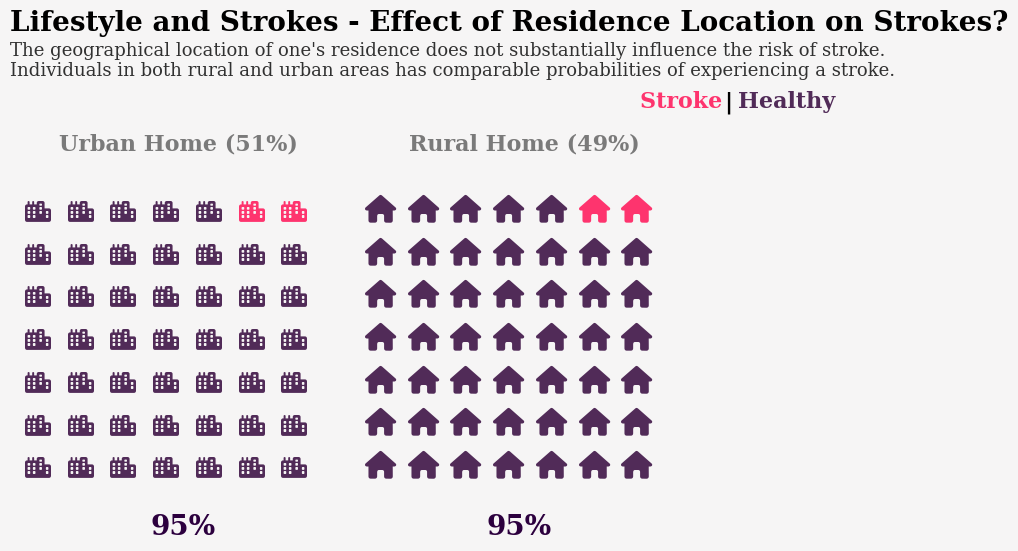

In [23]:
# Get stroke and healthy counts based on residence type
stroke_residence = df[df['stroke'] == 1]['Residence_type'].value_counts()
healthy_residence = df[df['stroke'] == 0]['Residence_type'].value_counts()

# Get total counts for urban and rural residences
urban_count = df['Residence_type'].value_counts().values[0]
rural_count = df['Residence_type'].value_counts().values[1]

# Calculate stroke and healthy percentages for both urban and rural areas
stroke_urban_pct = int(round(stroke_residence.values[0] / urban_count * 100, 0))
stroke_rural_pct = int(round(stroke_residence.values[1] / rural_count * 100, 0))
healthy_urban_pct = int(round(healthy_residence.values[0] / urban_count * 100, 0))
healthy_rural_pct = int(round(healthy_residence.values[1] / rural_count * 100, 0))

# Calculate percentages of urban and rural residences in the dataset
urban_pct = int(round(urban_count / (urban_count + rural_count) * 100, 0))
rural_pct = int(round(rural_count / (urban_count + rural_count) * 100, 0))

# Define common parameters for both subplots
common_params = {
    'rows': 7,
    'columns': 7,
    'colors': ['#fe346e', '#512b58'],
    'vertical': True,
    'interval_ratio_x': 0.005,
    'interval_ratio_y': 0.005,
    'plot_anchor': 'C',
    'alpha': 0.8,
    'starting_location': 'NE'
}

# Create the Waffle plot
fig = plt.figure(FigureClass=Waffle,
                 constrained_layout=True,  # Adjust layout
                 figsize=(7, 7),  # Set figure size
                 facecolor='#f6f5f5',  # Set background color
                 dpi=100,  # Set resolution
                 plots={
                     121: {  # Urban subplot
                         **common_params,  # Use common parameters
                         'values': [stroke_urban_pct, healthy_urban_pct],  # Data for urban
                         'icons': 'city',  # Use city icon for urban
                         'icon_size': 15,  # Icon size
                         'icon_legend': False  # Disable legend
                     },
                     122: {  # Rural subplot
                         **common_params,  # Use common parameters
                         'values': [stroke_rural_pct, healthy_rural_pct],  # Data for rural
                         'icons': 'home',  # Use home icon for rural
                         'icon_size': 20,  # Icon size for rural
                         'icon_legend': False  # Disable legend
                     }
                 }
)
# Adjust space between subplots
fig.subplots_adjust(wspace=2000, hspace=2000)

# Add main title and description
fig.text(0., 0.92, 'Lifestyle and Strokes - Effect of Residence Location on Strokes?', 
         {'font': 'Serif', 'size': 20, 'color': 'black', 'weight': 'bold'})
fig.text(0., 0.855, 'The geographical location of one\'s residence does not substantially influence the risk of stroke. \nIndividuals in both rural and urban areas has comparable probabilities of experiencing a stroke.',
         {'font': 'Serif', 'size': 13, 'color': 'black', 'weight': 'normal'}, alpha=0.8)

# Add text annotations for percentages and residence types
fig.text(0.2, 0.2, '{}%'.format(healthy_urban_pct), {'font': 'Serif', 'size': 20, 'weight': 'bold', 'color': '#2c003e'}, alpha=1)
fig.text(0.68, 0.2, '{}%'.format(healthy_rural_pct), {'font': 'Serif', 'size': 20, 'weight': 'bold', 'color': '#2c003e'}, alpha=1)
fig.text(0.07, 0.75, 'Urban Home ({}%)'.format(urban_pct), {'font': 'Serif', 'size': 16, 'weight': 'bold', 'color': 'black'}, alpha=0.5)
fig.text(0.57, 0.75, 'Rural Home ({}%)'.format(rural_pct), {'font': 'Serif', 'size': 16, 'weight': 'bold', 'color': 'black'}, alpha=0.5)

# Add legend for stroke vs. no stroke
fig.text(0.9, 0.81, 'Stroke ', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': '#fe346e'})
fig.text(1.02, 0.81, '|', {'color': 'black', 'size': '16', 'weight': 'bold'})
fig.text(1.04, 0.81, 'Healthy', 
         {'font': 'Serif', 'weight': 'bold', 'size': 16, 'color': '#512b58'}, alpha=1)

# Show the plot
plt.show()


<style>
.title {
    color: #fe346e;
    font-size: 21px;
    font-family: Sans-serif;
    font-weight: 600;
    justify-content: center;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
}
</style>

### <div class="title">Hypertension Distribution</div>

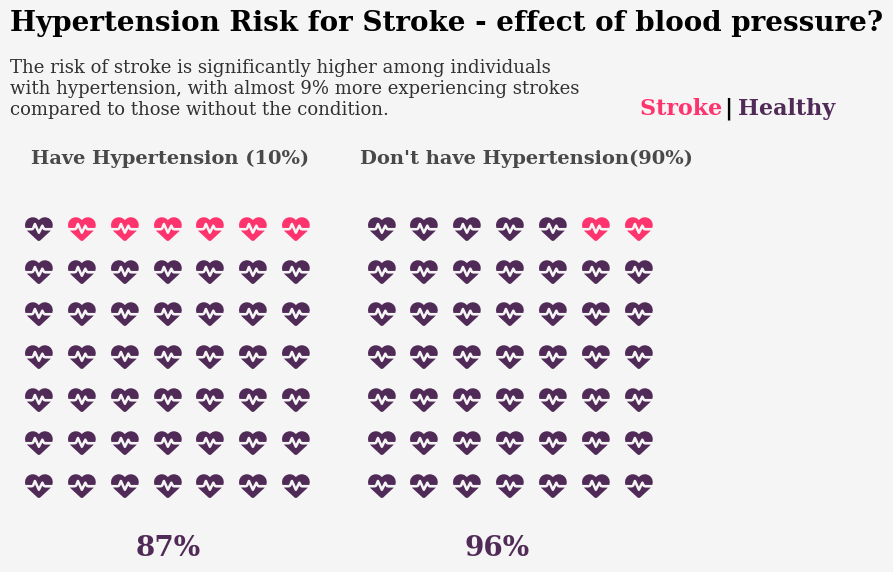

In [24]:
# Get counts of people with and without hypertension based on stroke status
stroke_hypertension = df[df['stroke'] == 1]['hypertension'].value_counts()
healthy_hypertension = df[df['stroke'] == 0]['hypertension'].value_counts()

# Total counts of people with and without hypertension
no_ht = df['hypertension'].value_counts().values[0]
yes_ht = df['hypertension'].value_counts().values[1]

# Calculate percentage of people with and without hypertension who had a stroke
stroke_no_ht = int(round(stroke_hypertension.values[0] / no_ht * 100, 0))
stroke_yes_ht = int(round(stroke_hypertension.values[1] / yes_ht * 100, 0))
# Calculate percentage of people with and without hypertension who did not have a stroke
healthy_no_ht = int(round(healthy_hypertension.values[0] / no_ht * 100, 0))
healthy_yes_ht = int(round(healthy_hypertension.values[1] / yes_ht * 100, 0))

# Get overall percentage of people with and without hypertension
no_ht_per = int(round(no_ht / (no_ht + yes_ht) * 100, 0))
yes_ht_per = int(round(yes_ht / (no_ht + yes_ht) * 100, 0))

# Create the Waffle plot
fig = plt.figure(FigureClass=Waffle, 
                 constrained_layout=True,
                 figsize=(7,7),
                 facecolor='#f6f5f5',
                 dpi=100,
                 interval_ratio_y=0.005,
                 interval_ratio_x=0.005,
                 plot_anchor='C',
                 icon_size=20,
                 icon_legend=False,
                 alpha=1,
                 vertical=True,
                 starting_location='NE',
                 plots={
                     121: {  # First subplot for people with hypertension
                         'rows': 7,
                         'columns': 7,
                         'values': [stroke_yes_ht, healthy_yes_ht],
                         'colors': ['#fe346e', '#512b58'],
                         'icons': 'heartbeat',
                     },
                     122: {  # Second subplot for people without hypertension
                         'rows': 7,
                         'columns': 7,
                         'values': [stroke_no_ht, healthy_no_ht],
                         'colors': ['#fe346e', '#512b58'],
                         'icons': 'heartbeat',
                     }
                 }
)

# Adjust space between subplots (if necessary)
fig.subplots_adjust(wspace=2000, hspace=2000)

# Add titles and annotations to explain the Waffle plot
fig.text(0., 0.95, 'Hypertension Risk for Stroke - effect of blood pressure?', 
         {'font':'Serif', 'size':20, 'color':'black', 'weight':'bold'})
fig.text(0., 0.83, 'The risk of stroke is significantly higher among individuals\nwith hypertension, with almost 9% more experiencing strokes \ncompared to those without the condition.', 
         {'font':'Serif', 'size':13, 'color':'black', 'weight':'normal'}, alpha=0.8)

# Additional annotations for percentages
fig.text(0.18, 0.20, '{}%'.format(healthy_yes_ht), 
         {'font':'Serif', 'size':20, 'weight':'bold', 'color':'#512b58'}, alpha=1)
fig.text(0.65, 0.20, '{}%'.format(healthy_no_ht), 
         {'font':'Serif', 'size':20, 'weight':'bold', 'color':'#512b58'}, alpha=1)
fig.text(0.03, 0.76, 'Have Hypertension ({}%)'.format(yes_ht_per), 
         {'font':'Serif', 'size':14, 'weight':'bold', 'color':'black'}, alpha=0.7)
fig.text(0.5, 0.76, "Don't have Hypertension({}%)".format(no_ht_per), 
         {'font':'Serif', 'size':14, 'weight':'bold', 'color':'black'}, alpha=0.7)

# Legend-like information
fig.text(0.90, 0.83, 'Stroke ', {'font': 'Serif', 'weight':'bold', 'size': 16, 'color': '#fe346e'})
fig.text(1.02, 0.83, '|', {'color': 'black', 'size': 16, 'weight': 'bold'})
fig.text(1.04, 0.83, 'Healthy', {'font': 'Serif', 'weight':'bold', 'size': 16, 'color': '#512b58'}, alpha=1)

# Display the plot
plt.show()

<style>
.title {
    color: #fe346e;
    font-size: 21px;
    font-family: Sans-serif;
    font-weight: 600;
    justify-content: center;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
}
</style>

### <div class="title">Smoking Distribution</div>

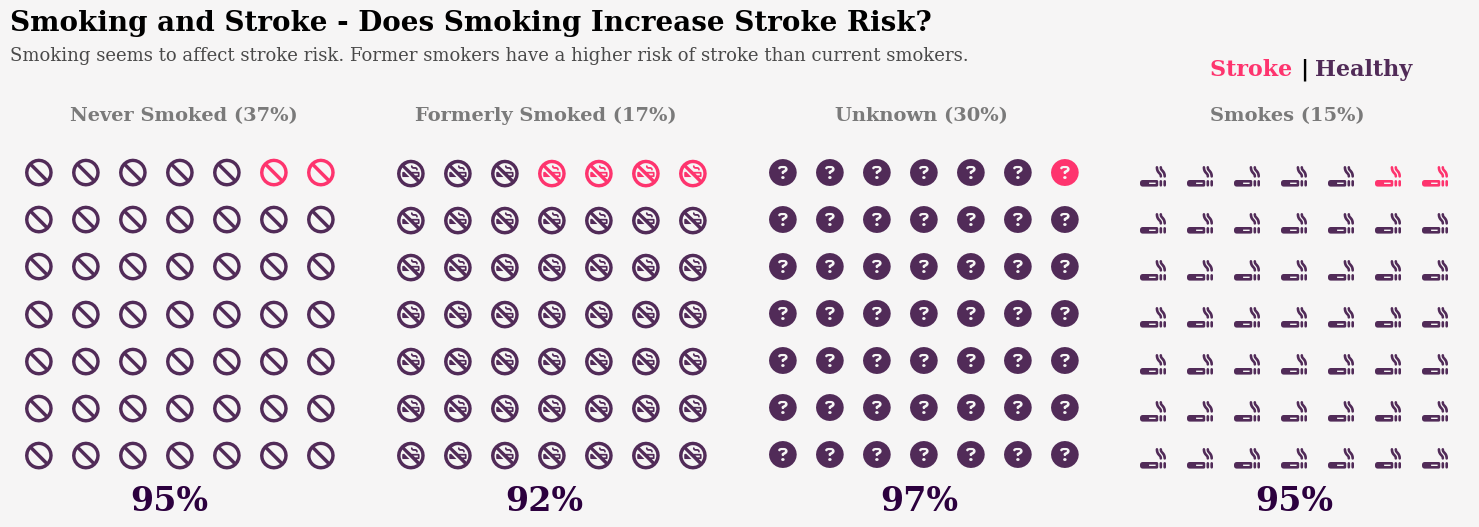

In [25]:
# Get counts of smoking status for all, stroke, and healthy groups
smoking_status_count = df_eda['smoking_status'].value_counts()
stroke_smoke_count = df_eda[df_eda['stroke'] == 1]['smoking_status'].value_counts()
healthy_smoke_count = df_eda[df_eda['stroke'] == 0]['smoking_status'].value_counts()

# Define overall counts for each smoking category
never_smoked_count = smoking_status_count['never smoked']
unknown_smoke_count = smoking_status_count['Unknown']
former_smoker_count = smoking_status_count['formerly smoked']
current_smoker_count = smoking_status_count['smokes']

# Calculate stroke percentages for each smoking category
stroke_never_smoked_pct = int(round(stroke_smoke_count['never smoked'] / never_smoked_count * 100, 0))
stroke_unknown_smoke_pct = int(round(stroke_smoke_count['Unknown'] / unknown_smoke_count * 100, 0))
stroke_former_smoker_pct = int(round(stroke_smoke_count['formerly smoked'] / former_smoker_count * 100, 0))
stroke_current_smoker_pct = int(round(stroke_smoke_count['smokes'] / current_smoker_count * 100, 0))

# Calculate healthy percentages for each smoking category
healthy_never_smoked_pct = int(round(healthy_smoke_count['never smoked'] / never_smoked_count * 100, 0))
healthy_unknown_smoke_pct = int(round(healthy_smoke_count['Unknown'] / unknown_smoke_count * 100, 0))
healthy_former_smoker_pct = int(round(healthy_smoke_count['formerly smoked'] / former_smoker_count * 100, 0))
healthy_current_smoker_pct = int(round(healthy_smoke_count['smokes'] / current_smoker_count * 100, 0))

# Calculate total percentages for each smoking category
never_smoked_pct = int(round(never_smoked_count / smoking_status_count.sum() * 100, 0))
unknown_smoke_pct = int(round(unknown_smoke_count / smoking_status_count.sum() * 100, 0))
former_smoker_pct = int(round(former_smoker_count / smoking_status_count.sum() * 100, 0))
current_smoker_pct = int(round(current_smoker_count / smoking_status_count.sum() * 100, 0))

# Define common parameters for the waffle subplots
common_waffle_params = {
    'rows': 7,
    'columns': 7,
    'colors': ['#fe346e', '#512b58'],
    'vertical': True,
    'interval_ratio_x': 0.005,
    'interval_ratio_y': 0.005,
    'icon_legend': False,
    'plot_anchor': 'C',
    'alpha': 0.8,
    'starting_location': 'NE'
}

# Create Waffle plot
fig = plt.figure(FigureClass=Waffle, 
                 constrained_layout=True,
                 figsize=(15, 15),
                 facecolor='#f6f5f5', dpi=100,
                 
                 plots={
                     141: {  # Never smoked category
                         **common_waffle_params,
                         'values': [stroke_never_smoked_pct, healthy_never_smoked_pct],
                         'icons': 'ban',
                         'icon_size': 20
                     },
                     142: {  # Formerly smoked category
                         **common_waffle_params,
                         'values': [stroke_former_smoker_pct, healthy_former_smoker_pct],
                         'icons': 'smoking-ban',
                         'icon_size': 20
                     },
                     143: {  # Unknown smoking status category
                         **common_waffle_params, 
                         'values': [stroke_unknown_smoke_pct, healthy_unknown_smoke_pct],
                         'icons': 'question-circle',
                         'icon_size': 20
                     },
                     144: { # Current smoker category
                         **common_waffle_params,
                         'values': [stroke_current_smoker_pct, healthy_current_smoker_pct],
                         'icons': 'smoking',
                         'icon_size': 15,
                         'interval_ratio_x': 0.006,
                         'interval_ratio_y': 0.006
                     }
                 }
)

# Adjust spacing between subplots
fig.subplots_adjust(wspace=2000, hspace=2000)

# Add main title and description
fig.text(0, 0.68, 'Smoking and Stroke - Does Smoking Increase Stroke Risk?', 
         {'font': 'Serif', 'size': 20, 'color': 'black', 'weight': 'bold'})
fig.text(0, 0.66, 'Smoking seems to affect stroke risk. Former smokers have a higher risk of stroke than current smokers.', 
         {'font': 'Serif', 'size': 13, 'color': 'black', 'weight': 'normal'}, alpha=0.7)

# Add percentage annotations for each smoking category
fig.text(0.08, 0.36, '{}%'.format(healthy_never_smoked_pct), {'font': 'Serif', 'size': 24, 'weight': 'bold', 'color': '#2c003e'}, alpha=1)
fig.text(0.33, 0.36, '{}%'.format(healthy_former_smoker_pct), {'font': 'Serif', 'size': 24, 'weight': 'bold', 'color': '#2c003e'}, alpha=1)
fig.text(0.58, 0.36, '{}%'.format(healthy_unknown_smoke_pct), {'font': 'Serif', 'size': 24, 'weight': 'bold', 'color': '#2c003e'}, alpha=1)
fig.text(0.83, 0.36, '{}%'.format(healthy_current_smoker_pct), {'font': 'Serif', 'size': 24, 'weight': 'bold', 'color': '#2c003e'}, alpha=1)

# Add category labels with total percentages
fig.text(0.04, 0.62, 'Never Smoked ({}%)'.format(never_smoked_pct), {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': 'black'}, alpha=0.5)
fig.text(0.27, 0.62, 'Formerly Smoked ({}%)'.format(former_smoker_pct), {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': 'black'}, alpha=0.5)
fig.text(0.55, 0.62, 'Unknown ({}%)'.format(unknown_smoke_pct), {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': 'black'}, alpha=0.5)
fig.text(0.8, 0.62, 'Smokes ({}%)'.format(current_smoker_pct), {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': 'black'}, alpha=0.5)

# Add legend for stroke and no stroke
fig.text(0.8, 0.65, 'Stroke ', {'font': 'Serif', 'weight': 'bold', 'size': 16, 'color': '#fe346e'})
fig.text(0.86, 0.65, '|', {'color': 'black', 'size': 16, 'weight': 'bold'})
fig.text(0.87, 0.65, 'Healthy', {'font': 'Serif', 'weight': 'bold', 'size': 16, 'color': '#512b58'})

# Show the plot
plt.show()

<style>
.title {
    color: #fe346e;
    font-size: 21px;
    font-family: Sans-serif;
    font-weight: 600;
    justify-content: center;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
}
</style>

### <div class="title">Work Type Distribution</div>

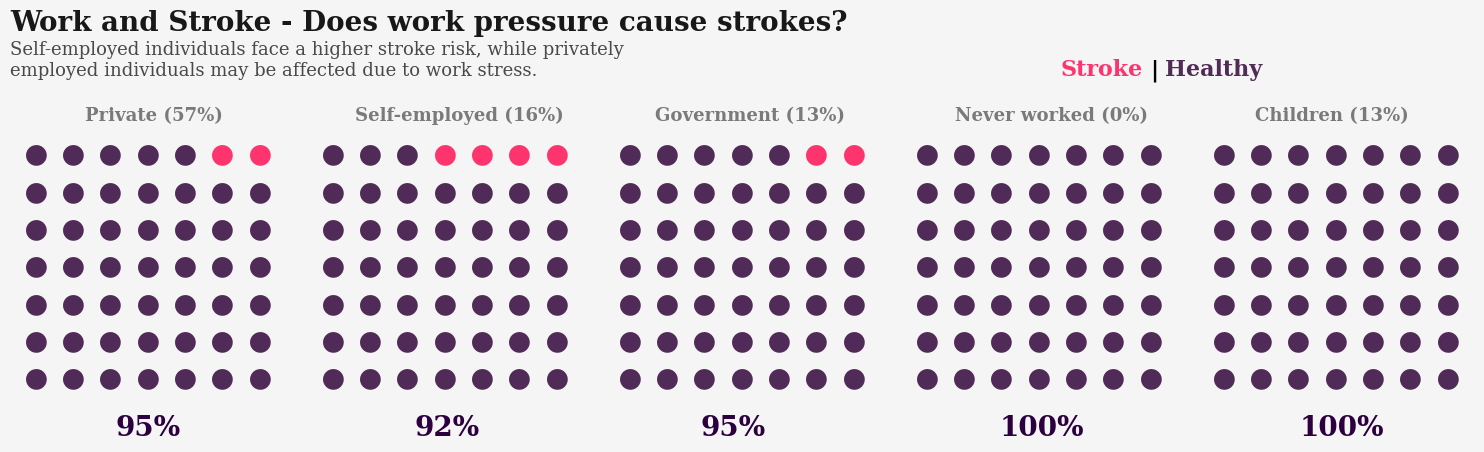

In [26]:
# Value counts for work type overall and by stroke occurrence
work_counts = df['work_type'].value_counts()
stroke_work_counts = df[df['stroke'] == 1]['work_type'].value_counts()
healthy_work_counts = df[df['stroke'] == 0]['work_type'].value_counts()

# Total counts for each work type category
private_work = work_counts.values[0]
self_employed = work_counts.values[1]
children = work_counts.values[2]
gov_work = work_counts.values[3]
never_worked = work_counts.values[4]

# Stroke percentage by work type
stroke_private_work = int(round(stroke_work_counts.values[0] / private_work * 100, 0))
stroke_self_employed = int(round(stroke_work_counts.values[1] / self_employed * 100, 0))
stroke_children = int(round(stroke_work_counts.values[3] / children * 100, 0))
stroke_gov_work = int(round(stroke_work_counts.values[2] / gov_work * 100, 0))
stroke_never_worked = 0  # No strokes for those who never worked

# Healthy (no stroke) percentage by work type
healthy_private_work = int(round(healthy_work_counts.values[0] / private_work * 100, 0))
healthy_self_employed = int(round(healthy_work_counts.values[1] / self_employed * 100, 0))
healthy_children = int(round(healthy_work_counts.values[2] / children * 100, 0))
healthy_gov_work = int(round(healthy_work_counts.values[3] / gov_work * 100, 0))
healthy_never_worked = int(round(healthy_work_counts.values[4] / never_worked * 100, 0))

# Percentages of overall work distribution
private_work_perc = int(round(private_work / (private_work + self_employed + children + gov_work + never_worked) * 100, 0))
self_employed_perc = int(round(self_employed / (private_work + self_employed + children + gov_work + never_worked) * 100, 0))
children_perc = int(round(children / (private_work + self_employed + children + gov_work + never_worked) * 100, 0))
gov_work_perc = int(round(gov_work / (private_work + self_employed + children + gov_work + never_worked) * 100, 0))
never_worked_perc = int(round(never_worked / (private_work + self_employed + children + gov_work + never_worked) * 100, 0))

# Waffle chart for work type and stroke occurrence
fig = plt.figure(FigureClass=Waffle, 
                 constrained_layout=True,
                 figsize=(15, 15),
                 facecolor='#f6f5f5', dpi=100,
                 vertical=True,
                 plot_anchor='C',
                 icon_legend=False,
                 alpha=0.2,
                 interval_ratio_x= 0.006,
                 interval_ratio_y= 0.006,
                 starting_location= 'NE',
                 plots={
                     151: {     
                         'rows': 7,
                         'columns': 7,
                         'values': [stroke_private_work, healthy_private_work],
                         'colors': ['#fe346e', '#512b58'],
                         'icons': 'circle',
                         'icon_size': 15,
                     },
                     152: { 
                         'rows': 7,
                         'columns': 7,
                         'values': [stroke_self_employed, healthy_self_employed],         
                         'colors': ['#fe346e', '#512b58'],
                         'icons': 'circle',
                         'icon_size': 15,
                         'alpha': 0.2
                     },
                     153: {     
                         'rows': 7,
                         'columns': 7,
                         'values': [stroke_gov_work, healthy_gov_work],
                         'colors': ['#fe346e', '#512b58'],
                         'icons': 'circle',
                         'icon_size': 15,
                     },
                     154: { 
                         'rows': 7,
                         'columns': 7,
                         'values': [stroke_never_worked, healthy_never_worked],         
                         'colors': ['#fe346e', '#512b58'],
                         'icons': 'circle',
                         'icon_size': 15,
                     },
                     155: { 
                         'rows': 7,
                         'columns': 7,
                         'values': [stroke_children, healthy_children],         
                         'colors': ['#fe346e', '#512b58'],
                         'icons': 'circle',
                         'icon_size': 15,
                     }
                 })
# Adjust spacing between subplots
fig.subplots_adjust(wspace=2000, hspace=2000)

# Adding text annotations for each subplot
fig.text(0, 0.65, 'Work and Stroke - Does work pressure cause strokes?', 
         {'font': 'Serif', 'size': 20, 'color': 'black', 'weight': 'bold'}, alpha=0.9)
fig.text(0, 0.62, 
         'Self-employed individuals face a higher stroke risk, while privately \nemployed individuals may be affected due to work stress.', 
         {'font': 'Serif', 'size': 13, 'color': 'black'}, alpha=0.7)

# Healthy work type percentage text
fig.text(0.07, 0.38, '{}%'.format(healthy_private_work), {'font': 'Serif', 'size': 20, 'weight': 'bold', 'color': '#2c003e'}, alpha=1)
fig.text(0.27, 0.38, '{}%'.format(healthy_self_employed), {'font': 'Serif', 'size': 20, 'weight': 'bold', 'color': '#2c003e'}, alpha=1)
fig.text(0.46, 0.38, '{}%'.format(healthy_gov_work), {'font': 'Serif', 'size': 20, 'weight': 'bold', 'color': '#2c003e'}, alpha=1)
fig.text(0.66, 0.38, '{}%'.format(healthy_never_worked), {'font': 'Serif', 'size': 20, 'weight': 'bold', 'color': '#2c003e'}, alpha=1)
fig.text(0.86, 0.38, '{}%'.format(healthy_children), {'font': 'Serif', 'size': 20, 'weight': 'bold', 'color': '#2c003e'}, alpha=1)

# Work type category labels with percentages
fig.text(0.05, 0.59, 'Private ({0}%)'.format(private_work_perc), {'font': 'Serif', 'size': 13, 'weight': 'bold', 'color': 'black'}, alpha=0.5)
fig.text(0.23, 0.59, 'Self-employed ({0}%)'.format(self_employed_perc), {'font': 'Serif', 'size': 13, 'weight': 'bold', 'color': 'black'}, alpha=0.5)
fig.text(0.43, 0.59, 'Government ({0}%)'.format(gov_work_perc), {'font': 'Serif', 'size': 13, 'weight': 'bold', 'color': 'black'}, alpha=0.5)
fig.text(0.63, 0.59, 'Never worked ({0}%)'.format(never_worked_perc), {'font': 'Serif', 'size': 13, 'weight': 'bold', 'color': 'black'}, alpha=0.5)
fig.text(0.83, 0.59, 'Children ({0}%)'.format(children_perc), {'font': 'Serif', 'size': 13, 'weight': 'bold', 'color': 'black'}, alpha=0.5)

# Legend indicating stroke and no stroke colors
fig.text(0.7, 0.62, 'Stroke', {'font': 'Serif', 'weight': 'bold', 'size': 16, 'color': '#fe346e'})
fig.text(0.76, 0.62, '|', {'color': 'black', 'size': 16, 'weight': 'bold'})
fig.text(0.77, 0.62, 'Healthy', {'font': 'Serif', 'weight': 'bold', 'size': 16, 'color': '#512b58'}, alpha=1)

# Display the plot
plt.show()

<style>
.title {
    color: #fe346e;
    font-size: 21px;
    font-family: Sans-serif;
    font-weight: 600;
    justify-content: center;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
}
</style>

### <div class="title">Heart Disease Distribution</div>

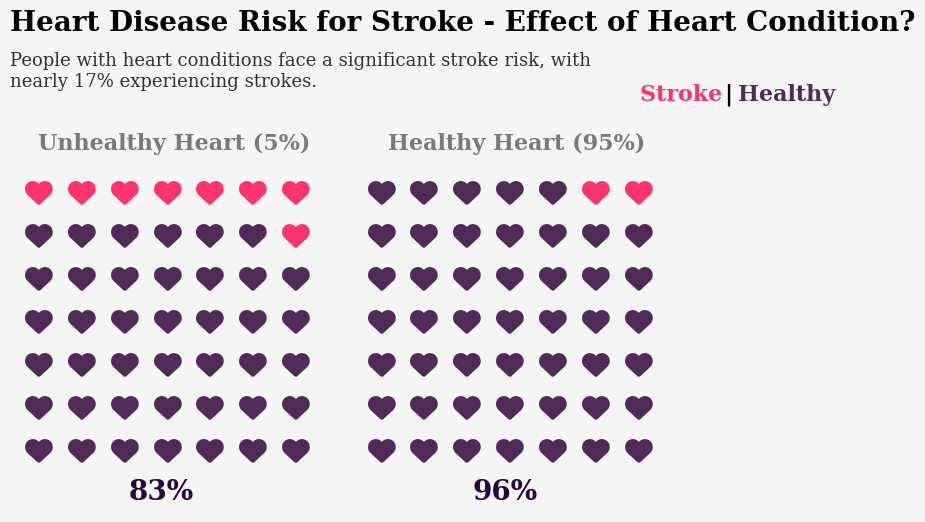

In [27]:
# Get counts of individuals with and without heart disease based on stroke status.
stroke_heart_disease_status = df[df['stroke'] == 1]['heart_disease'].value_counts()
healthy_heart_disease_status = df[df['stroke'] == 0]['heart_disease'].value_counts()

# Total counts of individuals with and without heart disease.
healthy_heart_count = df['heart_disease'].value_counts().values[0]
unhealthy_heart_count = df['heart_disease'].value_counts().values[1]

# Calculate percentage of individuals with and without heart disease who had a stroke.
stroke_healthy_heart_percentage = int(round(stroke_heart_disease_status.values[0] / healthy_heart_count * 100, 0))
stroke_unhealthy_heart_percentage = int(round(stroke_heart_disease_status.values[1] / unhealthy_heart_count * 100, 0))

# Calculate percentage of individuals with and without heart disease who did not have a stroke.
healthy_healthy_heart_percentage = int(round(healthy_heart_disease_status.values[0] / healthy_heart_count * 100, 0))
healthy_unhealthy_heart_percentage = int(round(healthy_heart_disease_status.values[1] / unhealthy_heart_count * 100, 0))

# Calculate overall percentage of individuals with and without heart disease.
unhealthy_heart_overall_percentage = int(round(unhealthy_heart_count / (unhealthy_heart_count + healthy_heart_count) * 100, 0))
healthy_heart_overall_percentage = int(round(healthy_heart_count / (unhealthy_heart_count + healthy_heart_count) * 100, 0))

# Create the Waffle plot to visualise individuals based on heart disease and stroke status.
fig = plt.figure(FigureClass=Waffle, 
                 constrained_layout=True,
                 figsize=(7, 7),
                 facecolor='#f6f5f5',
                 dpi=100,
                 
                 plots={
                     121: {
                         'rows': 7,
                         'columns': 7,
                         'values': [stroke_unhealthy_heart_percentage, healthy_unhealthy_heart_percentage],
                         'colors': ['#fe346e', '#512b58'],  # Colors for stroke and healthy.
                         'vertical': True,
                         'interval_ratio_x': 0.005,
                         'interval_ratio_y': 0.005,
                         'icons': 'heart',  # Heart icon to represent heart disease status.
                         'icon_legend': False,
                         'icon_size': 20,
                         'plot_anchor': 'C',
                         'alpha': 0.8,
                         'starting_location': 'NE'
                     },
                     122: {
                         'rows': 7,
                         'columns': 7,
                         'values': [stroke_healthy_heart_percentage, healthy_healthy_heart_percentage],
                         'colors': ['#fe346e', '#512b58'],
                         'vertical': True,
                         'interval_ratio_x': 0.005,
                         'interval_ratio_y': 0.005,
                         'icons': 'heart',
                         'icon_legend': False,
                         'icon_size': 20,
                         'plot_anchor': 'C',
                         'alpha': 0.8,
                         'starting_location': 'NE'
                     }
                 }
)

# Adjust space between subplots.
fig.subplots_adjust(wspace=2000, hspace=2000)

# Add titles and explanatory text to the Waffle plot.
fig.text(0., 0.9, 'Heart Disease Risk for Stroke - Effect of Heart Condition?', 
         {'font': 'Serif', 'size': 20, 'color': 'black', 'weight': 'bold'})
fig.text(0., 0.82, 'People with heart conditions face a significant stroke risk, with \nnearly 17% experiencing strokes.', 
         {'font': 'Serif', 'size': 13, 'color': 'black', 'weight': 'normal'}, alpha=0.8)

# Additional annotations for percentage representation of healthy individuals.
fig.text(0.24, 0.22, 'ooo', {'font': 'Serif', 'size': 16, 'weight': 'bold', 'color': '#f6f5f5'})
fig.text(0.65, 0.22, 'ooo', {'font': 'Serif', 'size': 16, 'weight': 'bold', 'color': '#f6f5f5'})
fig.text(0.17, 0.23, '{}%'.format(healthy_unhealthy_heart_percentage), 
         {'font': 'Serif', 'size': 20, 'weight': 'bold', 'color': '#2c003e'}, alpha=1)
fig.text(0.66, 0.23, '{}%'.format(healthy_healthy_heart_percentage), 
         {'font': 'Serif', 'size': 20, 'weight': 'bold', 'color': '#2c003e'}, alpha=1)

# Annotate with overall percentage of individuals with and without heart disease.
fig.text(0.04, 0.73, 'Unhealthy Heart ({}%)'.format(unhealthy_heart_overall_percentage), 
         {'font': 'Serif', 'size': 16, 'weight': 'bold', 'color': 'black'}, alpha=0.5)
fig.text(0.54, 0.73, 'Healthy Heart ({}%)'.format(healthy_heart_overall_percentage), 
         {'font': 'Serif', 'size': 16, 'weight': 'bold', 'color': 'black'}, alpha=0.5)

# Add legend-like labels for stroke and healthy categories.
fig.text(0.9, 0.8, 'Stroke ', {'font': 'Serif', 'weight': 'bold', 'size': 16, 'color': '#fe346e'})
fig.text(1.02, 0.8, '|', {'color': 'black', 'size': 16, 'weight': 'bold'})
fig.text(1.04, 0.8, 'Healthy', {'font': 'Serif', 'weight': 'bold', 'size': 16, 'color': '#512b58'}, alpha=1)

# Display the plot.
plt.show()

<style>
.title {
    color: #fe346e;
    font-size: 25px;
    font-family: Sans-serif;
    justify-content: left;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
    overflow: hidden;
    position: relative;
    transition: top ease 0.5s;
}
</style>

## <div class="title">2.9 Relationship between two continuous variables</div>

<style>
.title {
    color: #fe346e;
    font-size: 21px;
    font-family: Sans-serif;
    font-weight: 600;
    justify-content: center;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
}
</style>

### <div class="title">Relationship between Strokes with Gender & Marital Status</div>

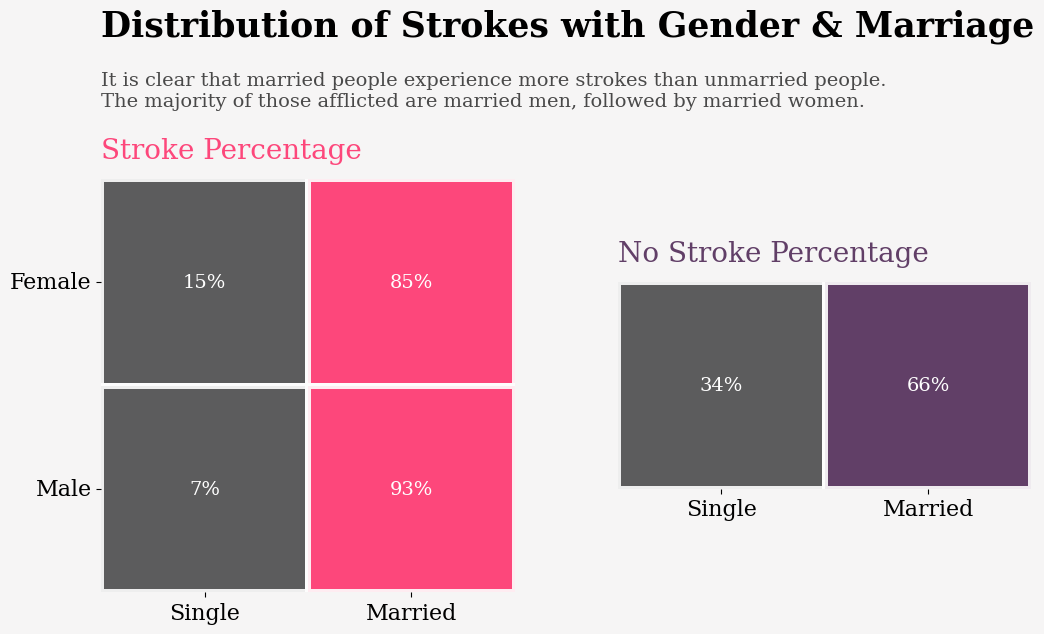

In [28]:
# Create a figure with two subplots (1 row, 2 columns)
fig = plt.figure(figsize=(12,6), dpi=100)
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.25, hspace=0.5)  # Adjust spacing between plots

# Add subplots
ax0 = fig.add_subplot(gs[0,0])  # First subplot
ax1 = fig.add_subplot(gs[0,1])  # Second subplot

# Set background color for the figure and subplots
fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')

# Create separate datasets for individuals with and without strokes
healthy = df_eda[df_eda['stroke'] == 0]  # Individuals with no stroke
stroke = df_eda[df_eda['stroke'] == 1]  # Individuals with stroke

# Define color schemes for heatmaps
col1 = ["#4b4b4c", "#fe346e"]  # Color scheme for the stroke group
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N=256)
col2 = ["#4b4b4c", "#512b58"]  # Color scheme for the no-stroke group
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

# Create crosstab tables for gender and marital status, normalized by row (gender)
stroke = pd.crosstab(stroke['gender'], [stroke['ever_married']], normalize='index')
no_stroke = pd.crosstab(healthy['gender'], [healthy['ever_married']], normalize='index')

# Plot heatmap for the stroke group (left subplot)
sns.heatmap(ax=ax0, data=stroke, linewidths=0, square=True, 
            cbar_kws={"orientation": "horizontal"}, cbar=False, linewidth=3, 
            cmap=col1, annot=True, fmt='1.0%', annot_kws={"fontsize": 14}, alpha=0.9)

# Plot heatmap for the no-stroke group (right subplot)
sns.heatmap(ax=ax1, data=no_stroke[0:-1], linewidths=0, square=True, 
            cbar_kws={"orientation": "horizontal"}, cbar=False, linewidth=3, 
            cmap=col2, annot=True, fmt='1.0%', annot_kws={"fontsize": 14}, alpha=0.9)

# Add title and description to the first subplot
ax0.text(0, -0.69, 'Distribution of Strokes with Gender & Marriage', 
         {'font': 'Serif', 'color': 'black', 'weight': 'bold', 'size': 25})
ax0.text(0, -0.35, 'It is clear that married people experience more strokes than unmarried people. \nThe majority of those afflicted are married men, followed by married women.', 
         {'font': 'Serif', 'color': 'black', 'size': 14}, alpha=0.7)

# Add labels for stroke and no-stroke heatmaps
ax0.text(0, -0.1, 'Stroke Percentage', {'font': 'serif', 'color': "#fe346e", 'size': 20}, alpha=0.9)
ax1.text(0, -0.1, 'No Stroke Percentage', {'font': 'serif', 'color': "#512b58", 'size': 20}, alpha=0.9)

# Set custom labels for the x-axis (Marital status) and y-axis (Gender) for both subplots
ax0.axes.set_xticklabels(['Single', 'Married'], fontdict={'font': 'serif', 'color': 'black', 'size': 16})
ax1.axes.set_xticklabels(['Single', 'Married'], fontdict={'font': 'serif', 'color': 'black', 'size': 16})
ax0.axes.set_yticklabels(['Female', 'Male'], fontdict={'font': 'serif', 'color': 'black', 'size': 16}, rotation=0)

# Remove axis labels for both subplots for a cleaner look
ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')

# Hide the y-axis for the second subplot (no-stroke)
ax1.axes.get_yaxis().set_visible(False)

# Show the final plot
plt.show()

<style>
.title {
    color: #fe346e;
    font-size: 21px;
    font-family: Sans-serif;
    font-weight: 600;
    justify-content: center;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
}
</style>

### <div class="title">Relationship between Strokes with Gender & Work Type</div>

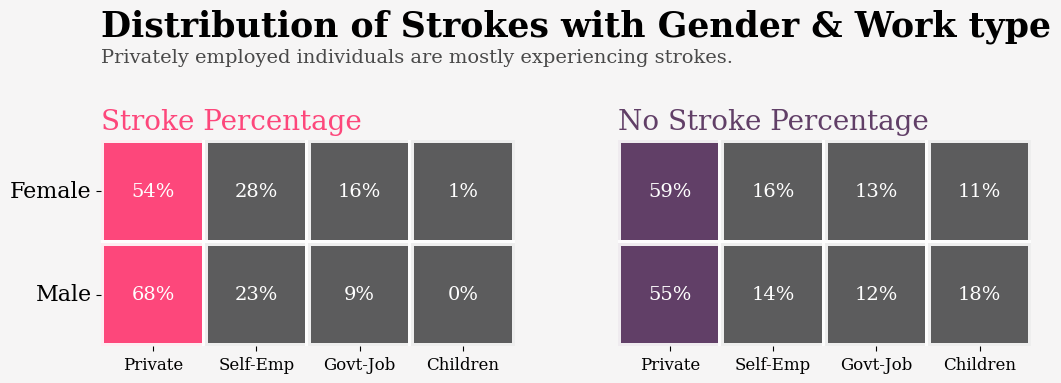

In [29]:
# Create a figure with two subplots, size 12x6 inches, and set dpi to 100 for resolution
fig = plt.figure(figsize=(12, 6), dpi=100)
gs = fig.add_gridspec(1, 2)  # Create a grid specification with 1 row and 2 columns for subplots
gs.update(wspace=0.25, hspace=0.5)  # Adjust spacing between the subplots (horizontal and vertical)

# Add two subplots to the figure
ax0 = fig.add_subplot(gs[0, 0])  # First subplot for stroke data
ax1 = fig.add_subplot(gs[0, 1])  # Second subplot for no-stroke data

# Set the background color for the entire figure and subplots
fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')

# Separate data into two subsets: 'healthy' for individuals with no stroke, and 'stroke' for those with a stroke
healthy = df_eda[df_eda['stroke'] == 0]  # No stroke group
stroke = df_eda[df_eda['stroke'] == 1]   # Stroke group

# Define the order of gender and work types for consistency in heatmap
gender_order = ['Female', 'Male']  # Ensure Female is shown first, followed by Male
work_order = ['Private', 'Self-employed', 'Govt_job', 'children']  # Specific order of work types

# Define two color schemes for the heatmaps
col1 = ["#4b4b4c", "#fe346e"]  # Stroke heatmap color: Grey and Pink
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N=256)
col2 = ["#4b4b4c", "#512b58"]  # No stroke heatmap color: Grey and Purple
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

# Create cross-tabulation for gender and work type for stroke data, normalized by gender
# This will give the percentage distribution for each work type by gender in the stroke group
stroke = pd.crosstab(stroke['gender'], [stroke['work_type']], normalize='index').loc[gender_order, work_order]

# Create similar cross-tabulation for the no-stroke group, normalized by gender
no_stroke = pd.crosstab(healthy['gender'], [healthy['work_type']], normalize='index').loc[gender_order, work_order]

# Plot heatmap for stroke data (ax0)
sns.heatmap(ax=ax0, data=stroke, linewidths=0, square=True, 
            cbar_kws={"orientation": "horizontal"}, cbar=False, 
            linewidth=3, cmap=col1, annot=True, fmt='1.0%', 
            annot_kws={"fontsize": 14}, alpha=0.9)

# Plot heatmap for no-stroke data (ax1)
sns.heatmap(ax=ax1, data=no_stroke, linewidths=0, square=True, 
            cbar_kws={"orientation": "horizontal"}, cbar=False, 
            linewidth=3, cmap=col2, annot=True, fmt='1.0%', 
            annot_kws={"fontsize": 14}, alpha=0.9)

# Add title and description to the first subplot (stroke group)
ax0.text(0, -1.0, 'Distribution of Strokes with Gender & Work type', 
         {'font': 'Serif', 'color': 'black', 'weight': 'bold', 'size': 25})
ax0.text(0, -0.75, 'Privately employed individuals are mostly experiencing strokes.', 
         {'font': 'Serif', 'color': 'black', 'size': 14}, alpha=0.7)

# Add labels indicating which subplot represents stroke and no-stroke data
ax0.text(0, -0.1, 'Stroke Percentage', {'font': 'serif', 'color': "#fe346e", 'size': 20}, alpha=0.9)
ax1.text(0, -0.1, 'No Stroke Percentage', {'font': 'serif', 'color': "#512b58", 'size': 20}, alpha=0.9)

# Set custom x-axis labels for work types (for both stroke and no-stroke heatmaps)
ax0.axes.set_xticklabels(['Private', 'Self-Emp', 'Govt-Job', 'Children'], fontdict={'font': 'serif', 'color': 'black', 'size': 12})
ax1.axes.set_xticklabels(['Private', 'Self-Emp', 'Govt-Job', 'Children'], fontdict={'font': 'serif', 'color': 'black', 'size': 12})

# Set y-axis labels for gender in the first subplot (stroke group)
ax0.axes.set_yticklabels(gender_order, fontdict={'font': 'serif', 'color': 'black', 'size': 16}, rotation=0)

# Remove axis labels for a cleaner look
ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')

# Hide y-axis for the second subplot (no-stroke data) to avoid redundancy
ax1.axes.get_yaxis().set_visible(False)

# Display the final plot with the two heatmaps
plt.show()

<style>
.title {
    color: #fe346e;
    font-size: 21px;
    font-family: Sans-serif;
    font-weight: 600;
    justify-content: center;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
}
</style>

### <div class="title">Relationship between Strokes with Gender & Smoking Status</div>

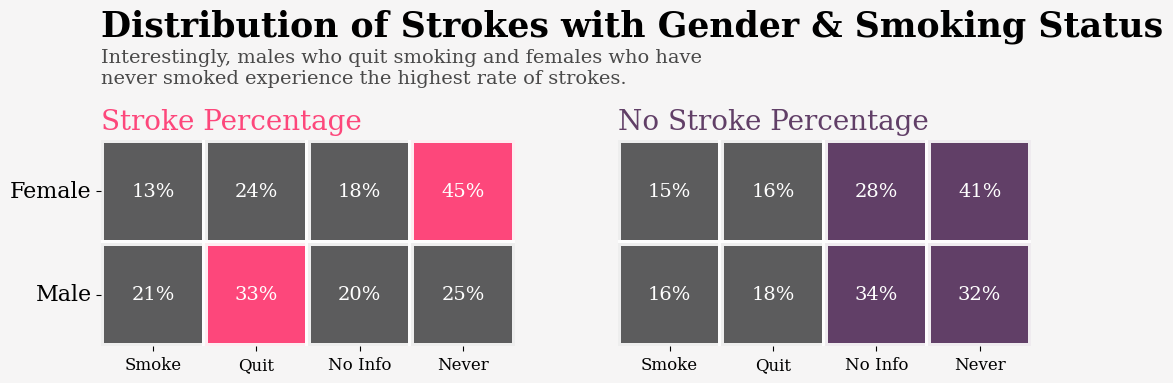

In [30]:
# Create a figure with 1 row and 2 columns of subplots, setting figure size to 12x6 inches and dpi to 100
fig = plt.figure(figsize=(12, 6), dpi=100)
gs = fig.add_gridspec(1, 2)  # Grid for 2 subplots (1 row, 2 columns)
gs.update(wspace=0.25, hspace=0.5)  # Adjust spacing between the plots

# Add subplots to the figure: ax0 for stroke data, ax1 for no-stroke data
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

# Set background color for the figure and both subplots
fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')

# Separate the data into two groups: stroke (people who had a stroke) and healthy (no stroke)
healthy = df_eda[df_eda['stroke'] == 0]  # No stroke group
stroke = df_eda[df_eda['stroke'] == 1]   # Stroke group

# Define the specific order for gender and smoking status categories for consistency in the plots
gender_order = ['Female', 'Male']
smoking_order = ['smokes', 'formerly smoked', 'Unknown', 'never smoked']

# Define two color schemes for the heatmaps
col1 = ["#4b4b4c", "#fe346e"]  # Stroke heatmap color: Grey and Pink
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N=256)

col2 = ["#4b4b4c", "#512b58"]  # No-stroke heatmap color: Grey and Purple
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

# Generate cross-tabulation (gender vs. smoking status) for the stroke group, normalized by gender
stroke = pd.crosstab(stroke['gender'], [stroke['smoking_status']], normalize='index').loc[gender_order, smoking_order]

# Generate similar cross-tabulation for the no-stroke group, also normalized by gender
no_stroke = pd.crosstab(healthy['gender'], [healthy['smoking_status']], normalize='index').loc[gender_order, smoking_order]

# Plot heatmap for the stroke group on the left subplot (ax0)
sns.heatmap(ax=ax0, data=stroke, linewidths=0, square=True, 
            cbar_kws={"orientation": "horizontal"}, cbar=False, 
            linewidth=3, cmap=col1, annot=True, fmt='1.0%', 
            annot_kws={"fontsize": 14}, alpha=0.9)

# Plot heatmap for the no-stroke group on the right subplot (ax1)
sns.heatmap(ax=ax1, data=no_stroke, linewidths=0, square=True, 
            cbar_kws={"orientation": "horizontal"}, cbar=False, 
            linewidth=3, cmap=col2, annot=True, fmt='1.0%', 
            annot_kws={"fontsize": 14}, alpha=0.9)

# Add a title and descriptive text above the first subplot (stroke group)
ax0.text(0, -1.0, 'Distribution of Strokes with Gender & Smoking Status', 
         {'font': 'Serif', 'color': 'black', 'weight': 'bold', 'size': 25})

# Add description highlighting the insights derived from the stroke data
ax0.text(0, -0.55, 'Interestingly, males who quit smoking and females who have \nnever smoked experience the highest rate of strokes.', 
         {'font': 'Serif', 'color': 'black', 'size': 14}, alpha=0.7)

# Add labels indicating stroke and no-stroke data percentages below each plot
ax0.text(0, -0.1, 'Stroke Percentage', {'font': 'serif', 'color': "#fe346e", 'size': 20}, alpha=0.9)
ax1.text(0, -0.1, 'No Stroke Percentage', {'font': 'serif', 'color': "#512b58", 'size': 20}, alpha=0.9)

# Set custom x-axis labels (simplified) for smoking status categories for both subplots
ax0.set_xticklabels(['Smoke', 'Quit', 'No Info', 'Never'], fontdict={'font': 'serif', 'color': 'black', 'size': 12})
ax1.set_xticklabels(['Smoke', 'Quit', 'No Info', 'Never'], fontdict={'font': 'serif', 'color': 'black', 'size': 12})

# Set custom y-axis labels (gender) for the stroke group heatmap, aligned vertically
ax0.set_yticklabels(gender_order, fontdict={'font': 'serif', 'color': 'black', 'size': 16}, rotation=0)

# Clear axis labels for a cleaner look
ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')

# Hide y-axis labels for the no-stroke heatmap to avoid redundancy
ax1.axes.get_yaxis().set_visible(False)

# Display the final figure with both heatmaps
plt.show()

<style>
.title {
    color: #fe346e;
    font-size: 21px;
    font-family: Sans-serif;
    font-weight: 600;
    justify-content: center;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
}
</style>

### <div class="title">Relationship between Strokes with Gender & Age</div>

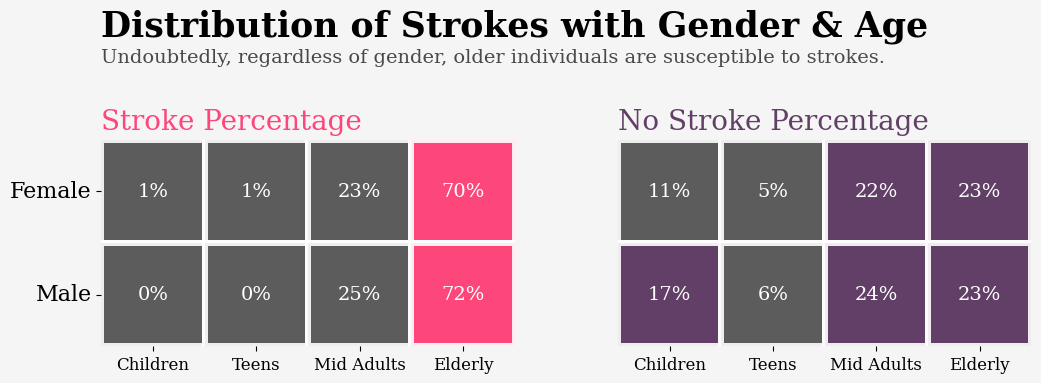

In [31]:
# Create a figure with 1 row and 2 columns of subplots, setting figure size to 12x6 inches and dpi to 100
fig = plt.figure(figsize=(12, 6), dpi=100)
gs = fig.add_gridspec(1, 2)  # Grid for 2 subplots (1 row, 2 columns)
gs.update(wspace=0.25, hspace=0.5)  # Adjust spacing between the plots

# Add subplots to the figure: ax0 for stroke data, ax1 for no-stroke data
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

# Set background color for the figure and both subplots
fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')

# Separate the data into two groups: stroke (people who had a stroke) and healthy (no stroke)
healthy = df_eda[df_eda['stroke'] == 0]  # No stroke group
stroke = df_eda[df_eda['stroke'] == 1]   # Stroke group

# Define the specific order for gender and age categories for consistency in the plots
gender_order = ['Female', 'Male']
age_order = ['Children', 'Teens', 'Mid Adults', 'Elderly']

# Define two color schemes for the heatmaps
col1 = ["#4b4b4c", "#fe346e"]  # Stroke heatmap color: Grey and Pink
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N=256)

col2 = ["#4b4b4c", "#512b58"]  # No-stroke heatmap color: Grey and Purple
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

# Generate cross-tabulation (gender vs. age category) for the stroke group, normalized by gender
stroke = pd.crosstab(stroke['gender'], [stroke['age_cat']], normalize='index').loc[gender_order, age_order]

# Generate similar cross-tabulation for the no-stroke group, also normalized by gender
no_stroke = pd.crosstab(healthy['gender'], [healthy['age_cat']], normalize='index').loc[gender_order, age_order]

# Plot heatmap for the stroke group on the left subplot (ax0)
sns.heatmap(ax=ax0, data=stroke, linewidths=0, square=True, 
            cbar_kws={"orientation": "horizontal"}, cbar=False, 
            linewidth=3, cmap=col1, annot=True, fmt='1.0%', 
            annot_kws={"fontsize": 14}, alpha=0.9)

# Plot heatmap for the no-stroke group on the right subplot (ax1)
sns.heatmap(ax=ax1, data=no_stroke, linewidths=0, square=True, 
            cbar_kws={"orientation": "horizontal"}, cbar=False, 
            linewidth=3, cmap=col2, annot=True, fmt='1.0%', 
            annot_kws={"fontsize": 14}, alpha=0.9)

# Add a title and descriptive text above the first subplot (stroke group)
ax0.text(0, -1.0, 'Distribution of Strokes with Gender & Age', 
         {'font': 'Serif', 'color': 'black', 'weight': 'bold', 'size': 25})

# Add description highlighting the key observation that elderly individuals are more prone to strokes
ax0.text(0, -0.75, 'Undoubtedly, regardless of gender, older individuals are susceptible to strokes.', 
         {'font': 'Serif', 'color': 'black', 'size': 14}, alpha=0.7)

# Add labels indicating stroke and no-stroke data percentages below each plot
ax0.text(0, -0.1, 'Stroke Percentage', {'font': 'serif', 'color': "#fe346e", 'size': 20}, alpha=0.9)
ax1.text(0, -0.1, 'No Stroke Percentage', {'font': 'serif', 'color': "#512b58", 'size': 20}, alpha=0.9)

# Set custom x-axis labels (age categories) for both subplots
ax0.set_xticklabels(age_order, fontdict={'font': 'serif', 'color': 'black', 'size': 12})
ax1.set_xticklabels(age_order, fontdict={'font': 'serif', 'color': 'black', 'size': 12})

# Set custom y-axis labels (gender) for the stroke group heatmap, aligned vertically
ax0.set_yticklabels(gender_order, fontdict={'font': 'serif', 'color': 'black', 'size': 16}, rotation=0)

# Clear axis labels for a cleaner look
ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')

# Hide y-axis labels for the no-stroke heatmap to avoid redundancy
ax1.axes.get_yaxis().set_visible(False)

# Display the final figure with both heatmaps
plt.show()

<style>
.title {
    color: #fe346e;
    font-size: 21px;
    font-family: Sans-serif;
    font-weight: 600;
    justify-content: center;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
}
</style>

### <div class="title">Relationship between Strokes with Gender & Average Glucose Level</div>

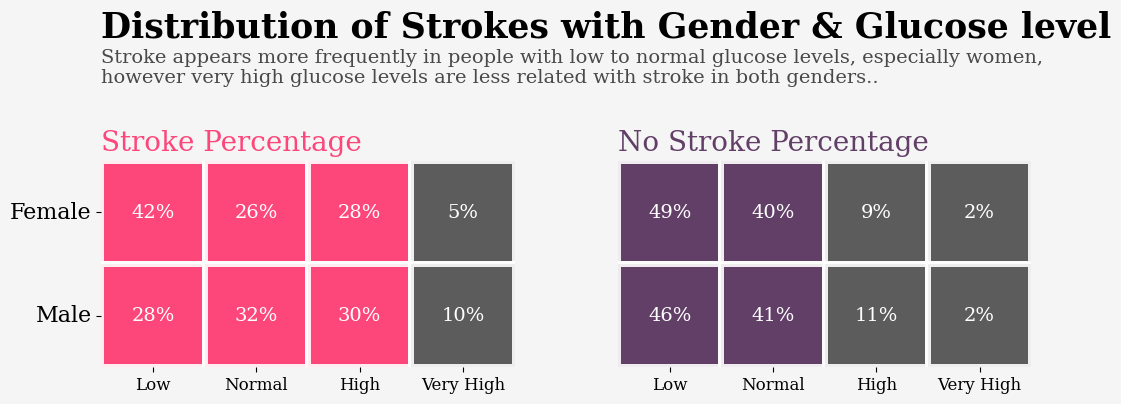

In [32]:
# Create a figure with specific size and resolution
fig = plt.figure(figsize=(12, 6), dpi=100)

# Create a grid specification with 1 row and 2 columns
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.25, hspace=0.5)  # Adjust space between subplots

# Add subplots to the grid
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

# Set the face color for the figure and subplots
fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')

# Split data into healthy individuals and stroke patients
healthy = df_eda[df_eda['stroke'] == 0]
stroke = df_eda[df_eda['stroke'] == 1]

# Define the order for gender and glucose categories
gender_order = ['Female', 'Male']
glucose_order = ['Low', 'Normal', 'High', 'Very High']

# Create custom colormaps for the heatmaps
col1 = ["#4b4b4c", "#fe346e"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N=256)
col2 = ["#4b4b4c", "#512b58"]
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

# Create cross-tabulations for stroke and no stroke data
stroke = pd.crosstab(stroke['gender'], [stroke['glucose_cat']], normalize='index').loc[gender_order, glucose_order]
no_stroke = pd.crosstab(healthy['gender'], [healthy['glucose_cat']], normalize='index').loc[gender_order, glucose_order]

# Plot the heatmap for stroke data
sns.heatmap(ax=ax0, data=stroke, linewidths=0, square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, 
            linewidth=3, cmap=col1, annot=True, fmt='1.0%', annot_kws={"fontsize": 14}, alpha=0.9)

# Plot the heatmap for no stroke data
sns.heatmap(ax=ax1, data=no_stroke, linewidths=0, square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, 
            linewidth=3, cmap=col2, annot=True, fmt='1.0%', annot_kws={"fontsize": 14}, alpha=0.9)

# Add titles and subtitles to the subplots
ax0.text(0, -1.2, 'Distribution of Strokes with Gender & Glucose level', {'font': 'Serif', 'color': 'black', 'weight': 'bold', 'size': 25})
ax0.text(0, -0.75, 'Stroke appears more frequently in people with low to normal glucose levels, especially women, \nhowever very high glucose levels are less related with stroke in both genders..', {'font': 'Serif', 'color': 'black', 'size': 14}, alpha=0.7)

# Add titles for the heatmaps
ax0.text(0, -0.1, 'Stroke Percentage', {'font': 'serif', 'color': "#fe346e", 'size': 20}, alpha=0.9)
ax1.text(0, -0.1, 'No Stroke Percentage', {'font': 'serif', 'color': "#512b58", 'size': 20}, alpha=0.9)

# Set custom labels for x and y axes
ax0.axes.set_xticklabels(glucose_order, fontdict={'font': 'serif', 'color': 'black', 'size': 12})
ax1.axes.set_xticklabels(glucose_order, fontdict={'font': 'serif', 'color': 'black', 'size': 12})
ax0.axes.set_yticklabels(gender_order, fontdict={'font': 'serif', 'color': 'black', 'size': 16}, rotation=0)

# Remove default labels for the axes
ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')

# Hide the y-axis for the second subplot
ax1.axes.get_yaxis().set_visible(False)

# Display the plots
plt.show()

<style>
.title {
    color: #fe346e;
    font-size: 21px;
    font-family: Sans-serif;
    font-weight: 600;
    justify-content: center;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
}
</style>

### <div class="title">Relationship between Strokes with Hypertension & Heart Disease</div>

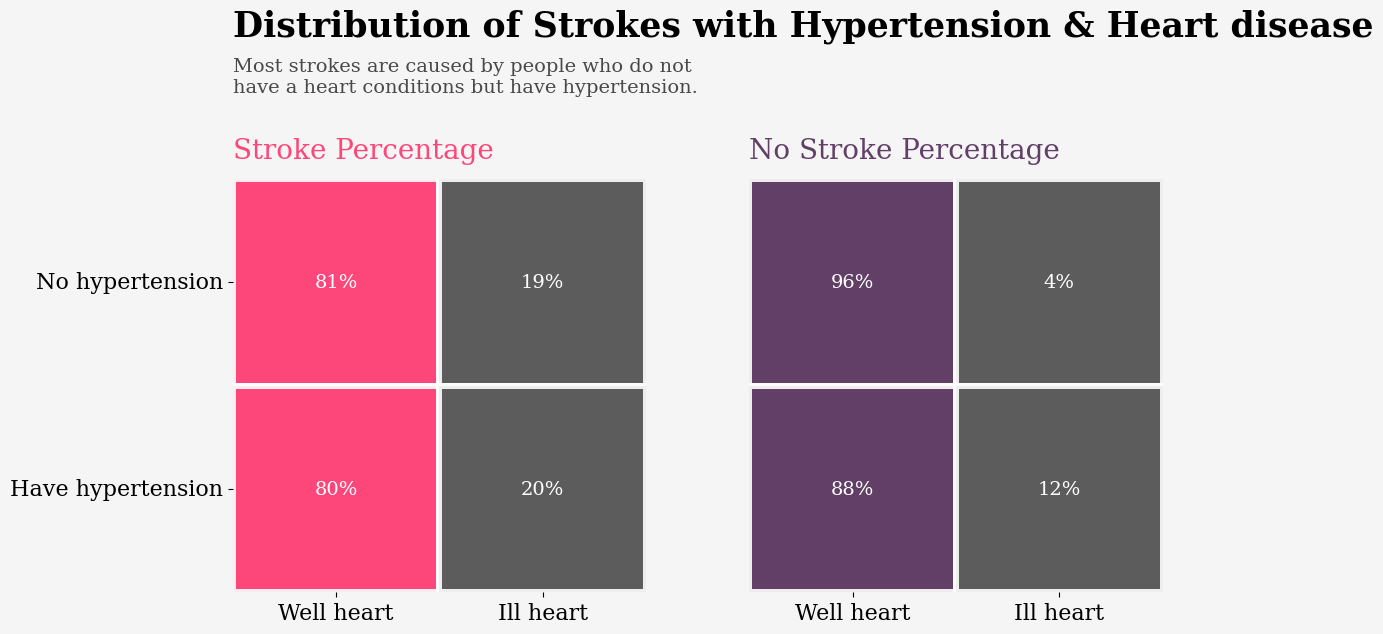

In [33]:
# Create a figure with specified size
fig = plt.figure(figsize=(12, 6))

# Create a GridSpec with 1 row and 2 columns
gs = fig.add_gridspec(1, 2)

# Adjust the spacing between subplots
gs.update(wspace=0.25, hspace=0.5)

# Add subplots to the figure
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

# Set background color for the figure and axes
fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')

# Filter the dataframe based on 'stroke' column
healthy = df_eda[df_eda['stroke'] == 0]
stroke = df_eda[df_eda['stroke'] == 1]

# Define color maps
col1 = ["#4b4b4c", "#fe346e"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N=256)
col2 = ["#4b4b4c", "#512b58"]
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

# Create crosstabs for stroke and no-stroke groups
stroke = pd.crosstab(stroke['hypertension'], [stroke['heart_disease']], normalize='index')
no_stroke = pd.crosstab(healthy['hypertension'], [healthy['heart_disease']], normalize='index')

# Plot heatmap for stroke data
sns.heatmap(ax=ax0, data=stroke, linewidths=0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, linewidth=3, cmap=col1, annot=True, fmt='1.0%', annot_kws={"fontsize": 14}, alpha=0.9)

# Plot heatmap for no-stroke data
sns.heatmap(ax=ax1, data=no_stroke, linewidths=0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, linewidth=3, cmap=col2, annot=True, fmt='1.0%', annot_kws={"fontsize": 14}, alpha=0.9)

# Add text annotations to the first subplot
ax0.text(0, -0.69, 'Distribution of Strokes with Hypertension & Heart disease', {'font': 'Serif', 'color': 'black', 'weight': 'bold', 'size': 25})
ax0.text(0, -0.42, 'Most strokes are caused by people who do not \nhave a heart conditions but have hypertension.', {'font': 'Serif', 'color': 'black', 'size': 14}, alpha=0.7)

# Add text annotations for percentage descriptions
ax0.text(0, -0.1, 'Stroke Percentage', {'font': 'serif', 'color': "#fe346e", 'size': 20}, alpha=0.9)
ax1.text(0, -0.1, 'No Stroke Percentage', {'font': 'serif', 'color': "#512b58", 'size': 20}, alpha=0.9)

# Set x-axis labels for both subplots
ax0.axes.set_xticklabels(['Well heart', 'Ill heart'], fontdict={'font': 'serif', 'color': 'black', 'size': 16})
ax1.axes.set_xticklabels(['Well heart', 'Ill heart'], fontdict={'font': 'serif', 'color': 'black', 'size': 16})

# Set y-axis labels for the first subplot
ax0.axes.set_yticklabels(['No hypertension', 'Have hypertension'], fontdict={'font': 'serif', 'color': 'black', 'size': 16}, rotation=0)

# Remove axis labels for cleaner look
ax0.set_ylabel('')
ax0.set_xlabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')

# Hide y-axis for the second subplot
ax1.axes.get_yaxis().set_visible(False)

# Display the plot
plt.show()

<style>
.border {
    color: white;
    font-weight: 550;
    font-size: 25px;
    font-family: Arial, Helvetica, sans-serif;
    padding: 15px;
    justify-content: center;
    box-shadow: 0 0px 3px rgba(0, 0, 0, 0.8);
    display: flex;
    max-width: 95%;
    margin: 0 auto;
    border-radius: 50px;
    transition: top ease 0.5s;
    overflow: hidden;
    position: relative;
    transition: top ease 0.5s;
    top: 5px;
}

.border-important {
    background-color: #fe346e;
}

.border:hover {
    box-shadow: 0 0px 10px rgba(0, 0, 0, 0.8);
    top: 0px
}
</style>

# <div class="border border-important">3. Model Enhancement: Feature Scaling & Data Balancing</div>

<style>
.title {
    color: #fe346e;
    font-size: 25px;
    font-family: Sans-serif;
    justify-content: left;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
    overflow: hidden;
    position: relative;
    transition: top ease 0.5s;
}
</style>

## <div class="title">3.1 Outliers Handling</div>

In [34]:
df_cleaned, total_outliers = detect_and_remove_outliers(df, num_col)
print(f"\nTotal number of outliers removed: {total_outliers}")
display_df_details(df_cleaned)

Outliers detected in the following columns:
age                  0         
avg_glucose_level    627       
bmi                  100       

Total number of outliers removed: 727


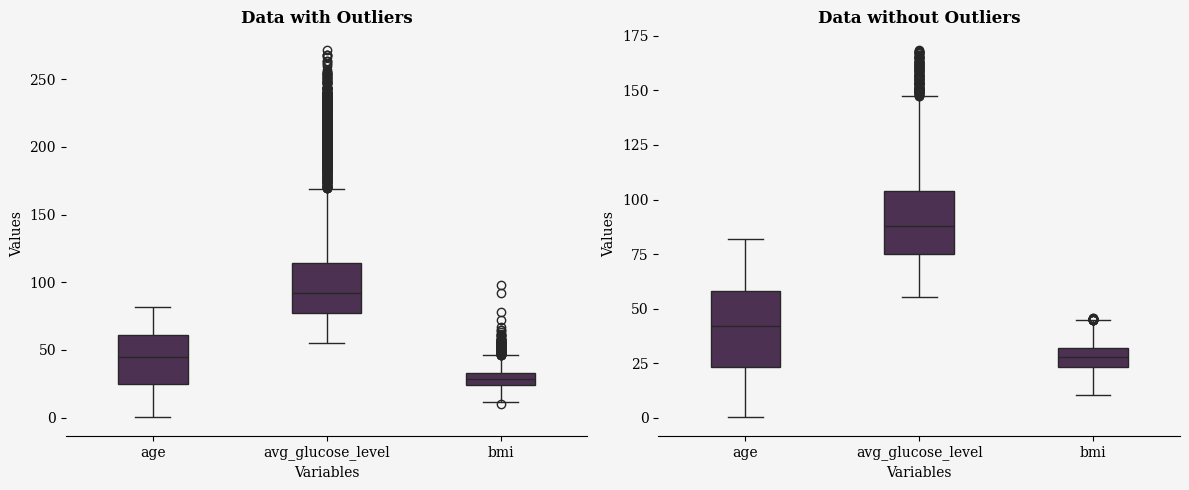

In [35]:
plot_boxplots_before_and_after(df, df_cleaned)

<style>
.title {
    color: #fe346e;
    font-size: 25px;
    font-family: Sans-serif;
    justify-content: left;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
    overflow: hidden;
    position: relative;
    transition: top ease 0.5s;
}
</style>

## <div class="title">3.2 Feature Scaling</div>

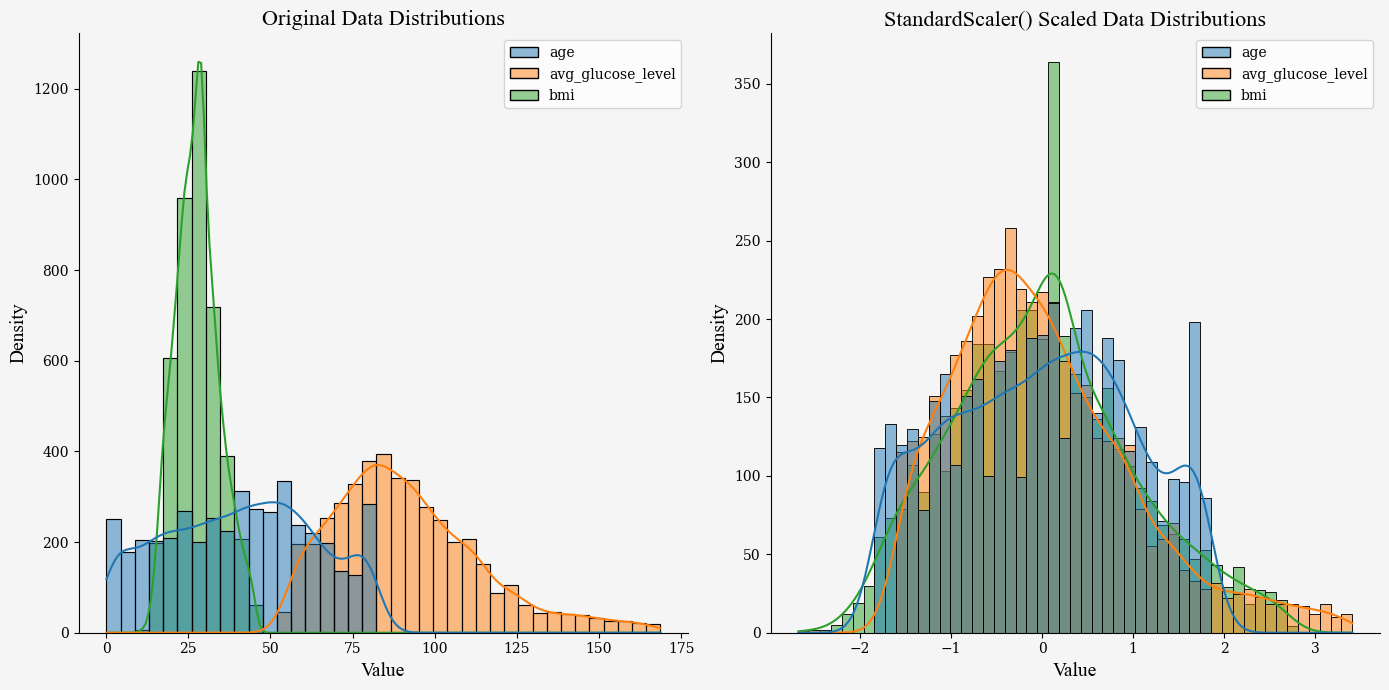

In [36]:
# Feature scaling
df_scaled = df_cleaned.copy()
df_scaled[num_col] = feature_scaling(df_cleaned[num_col], 'standard', True)

<style>
.title {
    color: #fe346e;
    font-size: 25px;
    font-family: Sans-serif;
    justify-content: left;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
    overflow: hidden;
    position: relative;
    transition: top ease 0.5s;
}
</style>

## <div class="title">3.3 SMOTE</div>

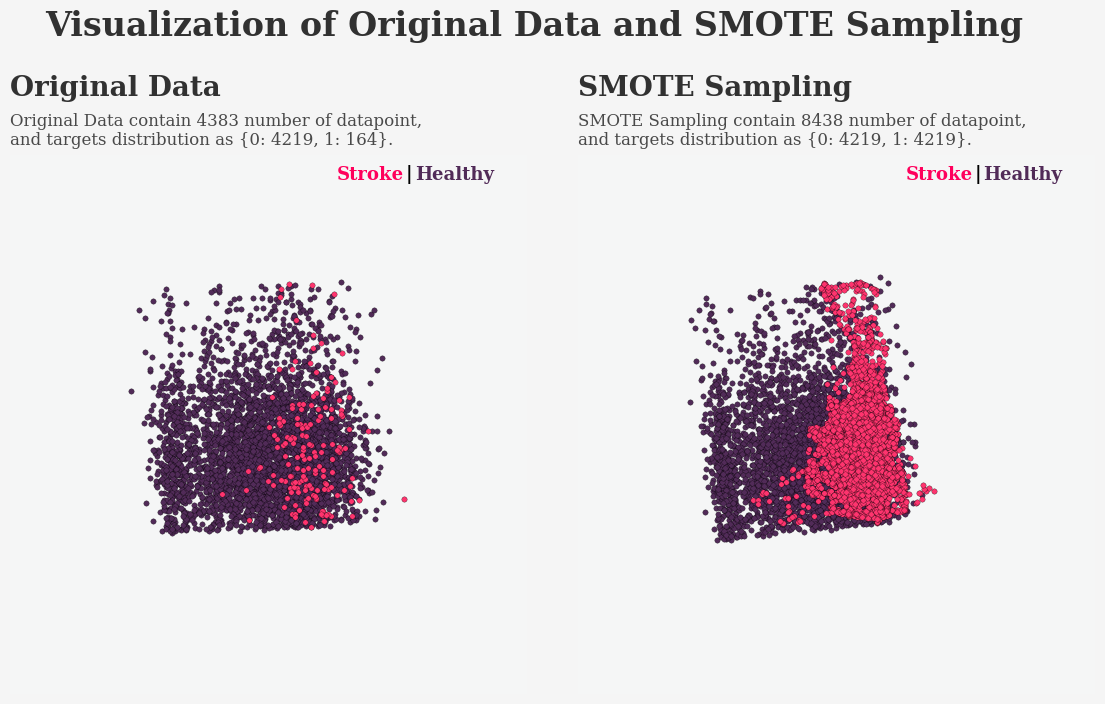

In [37]:
# Define the colors for the two classes (Stroke and Healthy)
colors = ['#fe346e', '#512b58']

# Apply SMOTE resampling on the original dataset
res_df = SMOTE_resample(df_scaled, neighbors=10)

# Create a figure for visualising the original and SMOTE resampled data
fig = plt.figure(figsize=(14, 7))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.1, hspace=0.1)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
axes = [ax1, ax2]

# Set figure background color
fig.patch.set_facecolor('#f5f5f5')

# Hide the y-axis on both subplots and set background color
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f8f8f8')

# Visualise the original data
ax1 = Sampling(df_scaled[num_col].values, df_scaled['stroke'].values.ravel(), 'Original Data', ax=ax1).visualise_data()

# Visualise the SMOTE-resampled data
ax2 = Sampling(res_df[num_col].values, res_df['stroke'].values, 'SMOTE Sampling', ax=ax2).visualise_data()

# Add a title for the entire figure
fig.text(0.15,1.05,'Visualization of Original Data and SMOTE Sampling', {'font': 'serif', 'weight': 'bold', 'size': 24}, alpha = 0.8)

# Display the plots
plt.show()

<style>
.border {
    color: white;
    font-weight: 550;
    font-size: 25px;
    font-family: Arial, Helvetica, sans-serif;
    padding: 15px;
    justify-content: center;
    box-shadow: 0 0px 3px rgba(0, 0, 0, 0.8);
    display: flex;
    max-width: 95%;
    margin: 0 auto;
    border-radius: 50px;
    transition: top ease 0.5s;
    overflow: hidden;
    position: relative;
    transition: top ease 0.5s;
    top: 5px;
}

.border-important {
    background-color: #fe346e;
}

.border:hover {
    box-shadow: 0 0px 10px rgba(0, 0, 0, 0.8);
    top: 0px
}
</style>

# <div class="border border-important">4. Modelling</div>

<style>
.title {
    color: #fe346e;
    font-size: 25px;
    font-family: Sans-serif;
    justify-content: left;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
    overflow: hidden;
    position: relative;
    transition: top ease 0.5s;
}
</style>

## <div class="title">4.1 Data Organisation</div>

In [38]:
# Feature selection
# X_train, X_test, y_train, y_test = split_data(res_df, 'stroke', cat_col, num_col, test_size=0.2, k_best=6)

# Split dataset
X = res_df.drop(['stroke'], axis=1)
y = res_df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6750, 10), (1688, 10), (6750,), (1688,))

<style>
.title {
    color: #fe346e;
    font-size: 25px;
    font-family: Sans-serif;
    justify-content: left;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
    overflow: hidden;
    position: relative;
    transition: top ease 0.5s;
}
</style>

## <div class="title">4.2 Classification: XGBoost, LightGBM, RF, CatBoost</div>

In [39]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, recall_score, precision_score, roc_auc_score

# Train and evaluate model
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    model_cm = confusion_matrix(y_test, y_pred)
    
    model_df = pd.DataFrame(
        data=[
            f1_score(y_test, y_pred),
            accuracy_score(y_test, y_pred),
            recall_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            roc_auc_score(y_test, y_pred)
        ],
        columns=[f'{type(model).__name__} Score'],
        index=["F1", "Accuracy", "Recall", "Precision", "ROC AUC Score"]
    )
    
    print(classification_report(y_test, y_pred))
    
    return model, model_df, model_cm

# Train and evaluate RF model
rf_model, rf_df, rf_cm = train_and_evaluate(RandomForestClassifier(), X_train, y_train, X_test, y_test)


              precision    recall  f1-score   support

           0       0.96      0.90      0.93       850
           1       0.90      0.97      0.93       838

    accuracy                           0.93      1688
   macro avg       0.93      0.93      0.93      1688
weighted avg       0.93      0.93      0.93      1688



In [40]:
# Train and evaluate XGBoost model
xgb_model, xgb_df, xgb_cm = train_and_evaluate(XGBClassifier(), X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       850
           1       0.91      0.96      0.94       838

    accuracy                           0.93      1688
   macro avg       0.94      0.94      0.93      1688
weighted avg       0.94      0.93      0.93      1688



In [41]:
# Train and evaluate LightGBM model
lgbm_model, lgbm_df, lgbm_cm = train_and_evaluate(LGBMClassifier(verbose=-1), X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       850
           1       0.94      0.97      0.95       838

    accuracy                           0.95      1688
   macro avg       0.95      0.95      0.95      1688
weighted avg       0.95      0.95      0.95      1688



In [42]:
from catboost import CatBoostClassifier

# Train and evaluate RandomForest model
cat_model, cat_df, cat_cm = train_and_evaluate(CatBoostClassifier(verbose=0, allow_writing_files=False), X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       850
           1       0.93      0.98      0.95       838

    accuracy                           0.95      1688
   macro avg       0.95      0.95      0.95      1688
weighted avg       0.95      0.95      0.95      1688



<style>
.border {
    color: white;
    font-weight: 550;
    font-size: 25px;
    font-family: Arial, Helvetica, sans-serif;
    padding: 15px;
    justify-content: center;
    box-shadow: 0 0px 3px rgba(0, 0, 0, 0.8);
    display: flex;
    max-width: 95%;
    margin: 0 auto;
    border-radius: 50px;
    transition: top ease 0.5s;
    overflow: hidden;
    position: relative;
    transition: top ease 0.5s;
    top: 5px;
}

.border-important {
    background-color: #fe346e;
}

.border:hover {
    box-shadow: 0 0px 10px rgba(0, 0, 0, 0.8);
    top: 0px
}
</style>

# <div class="border border-important">5. Model Evaluation</div>

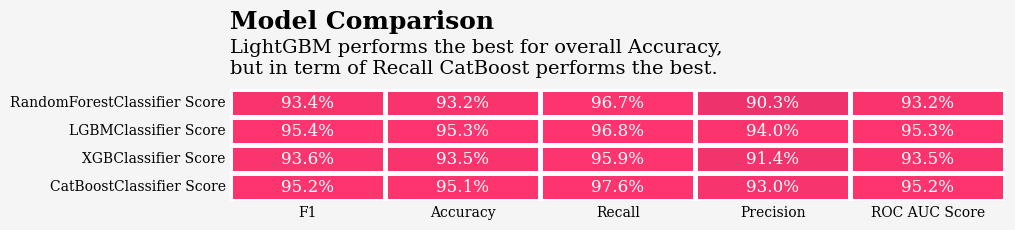

In [43]:
# Concatenate model dataframes and round to 3 decimal places
df_models_combined = round(pd.concat([rf_df, lgbm_df, xgb_df, cat_df], axis=1), 3)

# Define colors for the heatmap
colors = ['grey', '#512b58', '#fe346e']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

# Set background color for the plot
background_color = "#f5f5f5"

# Create the figure and specify size
fig = plt.figure(figsize=(10, 8))

# Create grid specification for subplots
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)

# Add a subplot in the specified grid position
ax0 = fig.add_subplot(gs[0, :])

# Draw the heatmap with specified properties
sns.heatmap(df_models_combined.T, cmap=colormap, annot=True, fmt=".1%", vmin=0, vmax=0.95, 
            linewidths=2.5, cbar=False, ax=ax0, annot_kws={"fontsize":12})

# Set figure background color
fig.patch.set_facecolor(background_color)

# Set background color for the heatmap
ax0.set_facecolor(background_color)

# Add title and subtitle to the plot
ax0.text(0, -2.15, 'Model Comparison', fontsize=18, fontweight='bold', fontfamily='serif')
ax0.text(0, -0.55, 'LightGBM performs the best for overall Accuracy,\nbut in term of Recall CatBoost performs the best.', 
         fontsize=14, fontfamily='serif')

# Remove tick marks
ax0.tick_params(axis='both', which='both', length=0)

# Show the plot
plt.show()

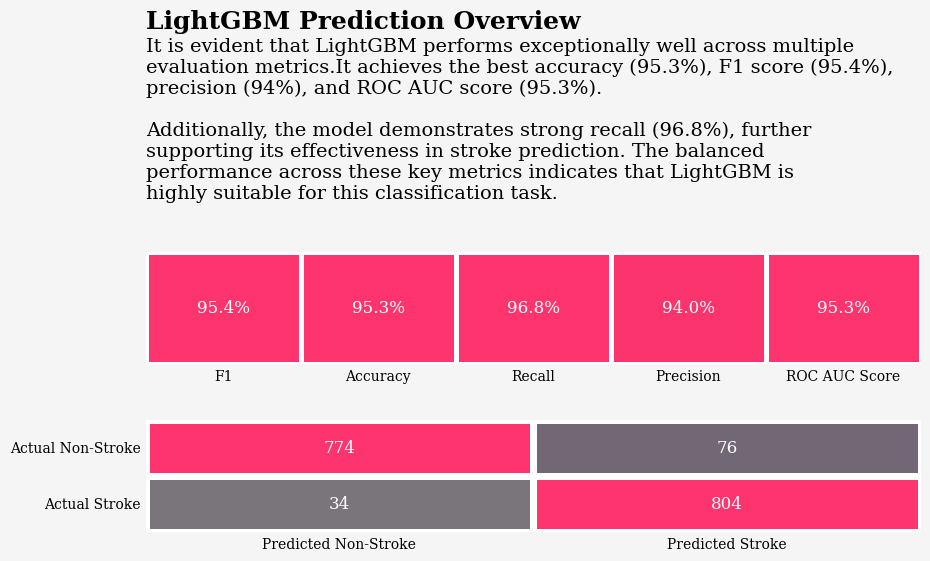

In [44]:
# Define colors for the heatmap
colors = ['grey', '#512b58', '#fe346e']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

# Set background color for the plot
background_color = "#f5f5f5"

# Create the figure and specify size
fig = plt.figure(figsize=(10, 8))

# Create grid specification for subplots
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)

# Add subplots in the specified grid positions
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, :])

# Draw the heatmap for XGBoost model predictions
sns.heatmap(lgbm_df.T, cmap=colormap, annot=True, fmt=".1%", vmin=0, vmax=0.95, 
            yticklabels='', linewidths=2.5, cbar=False, ax=ax0, annot_kws={"fontsize":12})

# Set background color for the figure and subplots
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)

# Add title and description to the first subplot
ax0.text(0, -2, 'LightGBM Prediction Overview', fontsize=18, fontweight='bold', fontfamily='serif')
ax0.text(0, -0.3,
'''
It is evident that LightGBM performs exceptionally well across multiple 
evaluation metrics.It achieves the best accuracy (95.3%), F1 score (95.4%), 
precision (94%), and ROC AUC score (95.3%). 

Additionally, the model demonstrates strong recall (96.8%), further 
supporting its effectiveness in stroke prediction. The balanced 
performance across these key metrics indicates that LightGBM is 
highly suitable for this classification task.
''',
fontsize=14, fontfamily='serif')

# Remove tick marks from the first subplot
ax0.tick_params(axis='both', which='both', length=0)

# Draw the heatmap for the confusion matrix of XGBoost predictions
sns.heatmap(xgb_cm, cmap=colormap, annot=True, fmt="d", linewidths=5, cbar=False, ax=ax1,
            yticklabels=['Actual Non-Stroke', 'Actual Stroke'], vmax=500, vmin=0,
            xticklabels=['Predicted Non-Stroke', 'Predicted Stroke'], annot_kws={"fontsize":12})

# Remove tick marks from both subplots
ax0.tick_params(axis='both', which='both', length=0)
ax1.tick_params(axis='both', which='both', length=0)

# Show the plot
plt.show()

<style>
.border {
    color: white;
    font-weight: 550;
    font-size: 25px;
    font-family: Arial, Helvetica, sans-serif;
    padding: 15px;
    justify-content: center;
    box-shadow: 0 0px 3px rgba(0, 0, 0, 0.8);
    display: flex;
    max-width: 95%;
    margin: 0 auto;
    border-radius: 50px;
    transition: top ease 0.5s;
    overflow: hidden;
    position: relative;
    transition: top ease 0.5s;
    top: 5px;
}

.border-important {
    background-color: #fe346e;
}

.border:hover {
    box-shadow: 0 0px 10px rgba(0, 0, 0, 0.8);
    top: 0px
}
</style>

# <div class="border border-important">6. Feature Importance Analysis</div>

In [45]:
# Feature Importance Dataframe
feature_importance_df = pd.DataFrame({'Feature':X_train.columns, 'Importance':lgbm_model.feature_importances_}).sort_values('Importance', ascending=False).reset_index(drop=True)
feature_importance_df[:10].style.background_gradient(cmap=colormap)

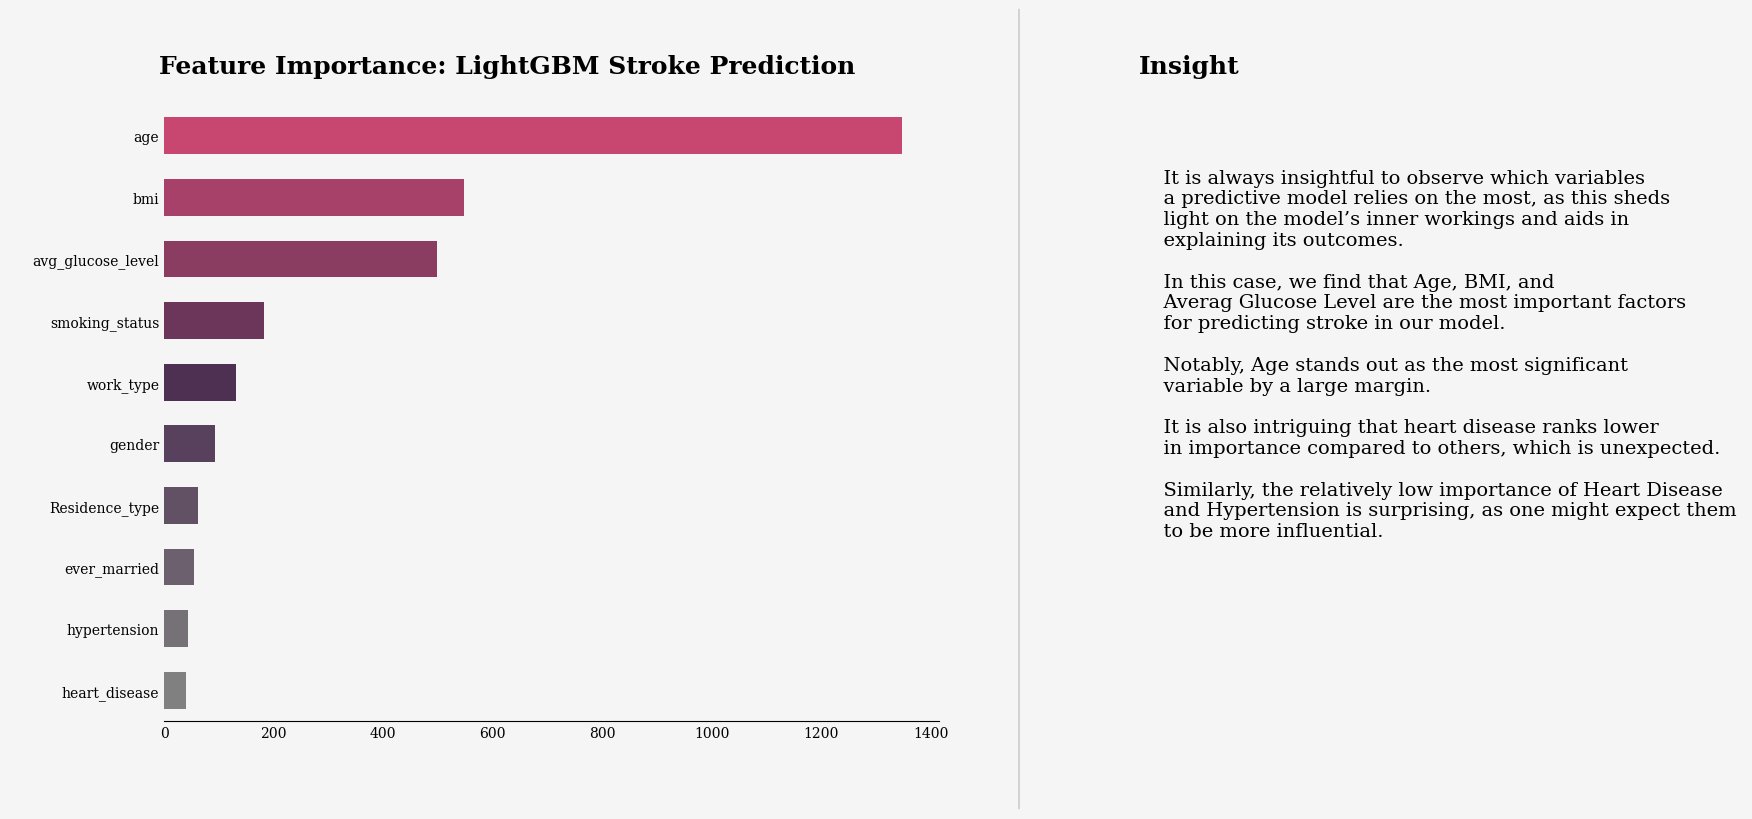

In [46]:

insight = '''
    It is always insightful to observe which variables 
    a predictive model relies on the most, as this sheds 
    light on the model’s inner workings and aids in 
    explaining its outcomes.

    In this case, we find that Age, BMI, and 
    Averag Glucose Level are the most important factors 
    for predicting stroke in our model.

    Notably, Age stands out as the most significant 
    variable by a large margin.

    It is also intriguing that heart disease ranks lower 
    in importance compared to others, which is unexpected.

    Similarly, the relatively low importance of Heart Disease 
    and Hypertension is surprising, as one might expect them 
    to be more influential.
    ''' 
feature_importance_analysis(feature_importance_df, insight)

<style>
.border {
    color: white;
    font-weight: 550;
    font-size: 25px;
    font-family: Arial, Helvetica, sans-serif;
    padding: 15px;
    justify-content: center;
    box-shadow: 0 0px 3px rgba(0, 0, 0, 0.8);
    display: flex;
    max-width: 95%;
    margin: 0 auto;
    border-radius: 50px;
    transition: top ease 0.5s;
    overflow: hidden;
    position: relative;
    transition: top ease 0.5s;
    top: 5px;
}

.border-important {
    background-color: #fe346e;
}

.border:hover {
    box-shadow: 0 0px 10px rgba(0, 0, 0, 0.8);
    top: 0px
}
</style>

# <div class="border border-important">7. Machine Learning Explainability</div>

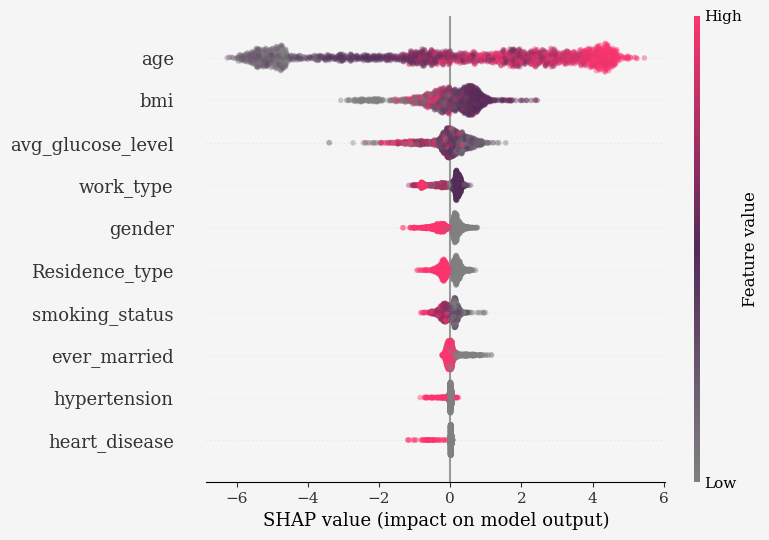

In [47]:
# SHAP implementation
import shap
shap.initjs()

# Initialize the explainer
explainer = shap.Explainer(lgbm_model)
shap_values = explainer(X_test)

# Customize font type
plt.rcParams['font.family'] = 'serif'

# Customize background color of the figure
plt.gcf().set_facecolor('#f6f5f5')

# Customize background color of the plot area (axes)
ax = plt.gca()
ax.set_facecolor('#f6f5f5')

# Summary plot
shap.summary_plot(shap_values, X_test, alpha=0.4,cmap=colormap)
# Show the plot
plt.show()

In [48]:
shap.force_plot(explainer.expected_value, shap_values.values, X_test)

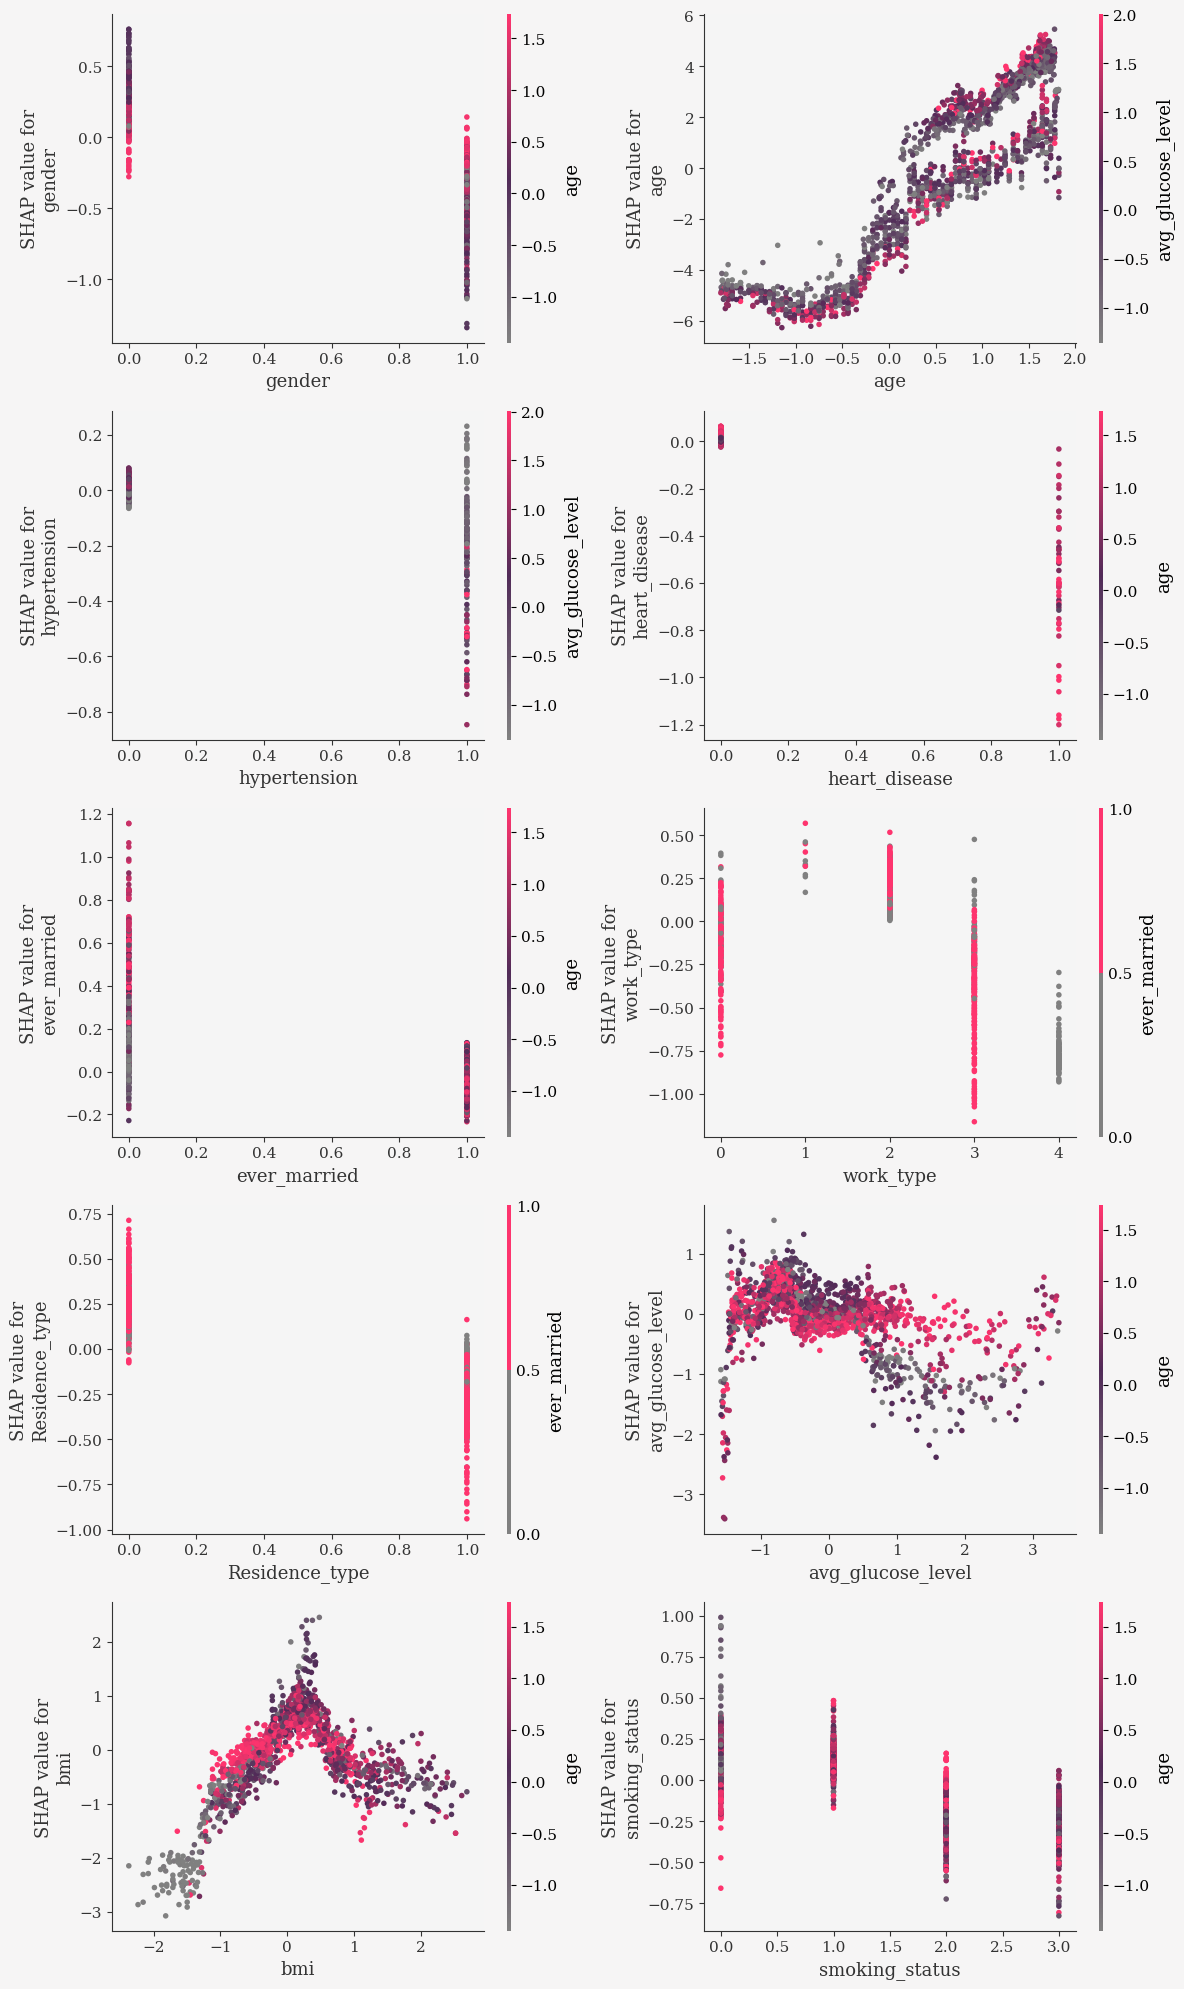

In [49]:
col_num = min(2, len(X_test.columns))
rows_num = (len(X_test.columns) + col_num - 1) // col_num

fig, axes = plt.subplots(nrows=rows_num, ncols=col_num, figsize=(6*col_num, 4 * rows_num))

for i, ind in enumerate(X_test.columns):
    row = i // col_num
    col = i % col_num
    axes[row, col].set_facecolor('#f5f5f5')
    shap.dependence_plot(ind, shap_values.values, X_test, ax=axes[row, col], feature_names=X_test.columns, show=False, cmap=colormap)

plt.tight_layout() 
plt.show()

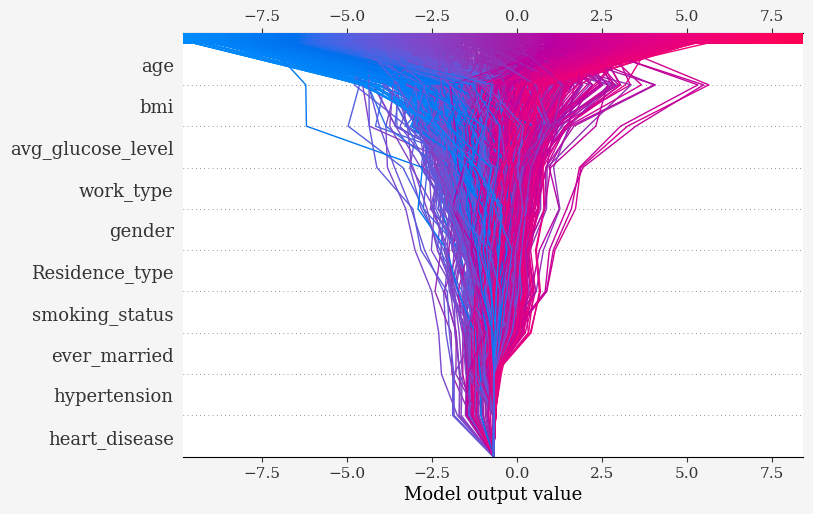

In [50]:
# Extract the first row of SHAP values and the corresponding instance from X_test
specific_shap_values = shap_values.values[100]
specific_instance = X_test.iloc[200]

# Create the decision plot for the specific row of X_test
# shap.decision_plot(explainer.expected_value, specific_shap_values, specific_instance)

# Create the decision plot for the entire dataset
shap.decision_plot(explainer.expected_value, shap_values.values, X_test)

# Show the plot
plt.show()

<style>
.title {
    color: #fe346e;
    font-size: 30px;
    font-weight: bold;
    justify-content: center;
    display: flex;
    max-width: 95%;
    margin: 0 auto;
    overflow: hidden;
    position: relative;
    transition: top ease 0.5s;
}
</style>

# <div class="title">The End</div>